In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm
warnings.filterwarnings('ignore')

raw_data1=pd.read_csv("heart.csv")
raw_data2=pd.read_csv("o2Saturation.csv")

raw_data = pd.merge(raw_data1, raw_data2, left_index=True, right_index=True)

raw_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


In [4]:
data.rename(columns={"98.6":"o2Saturation","trtbps":"blood_pressure","chol":"Cholestoral", 'cp':'Chest_pain_type',  
                     'restecg':'Resting_electrocardiographic_results',
                     'exng':'Exercise_induced_angina', 'oldpeak':'ST_depression','slp':'slope_of_the_peak_exercise_ST_segment',
                       'caa':'Num_of_major_vessels_colored_by_flourosopy',
                   "fbs":"fasting_blood_sugar","thalachh":"max_heart_rate","exng":"exercise"},inplace=True)

In [5]:
data.head()

,age,sex,Chest_pain_type,blood_pressure,Cholestoral,fasting_blood_sugar,Resting_electrocardiographic_results,max_heart_rate,exercise,ST_depression,slope_of_the_peak_exercise_ST_segment,Num_of_major_vessels_colored_by_flourosopy,thall,output,o2Saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


In [3]:
data=raw_data.copy()
print('data.shape: ', data.shape)
data.head()

data.shape:  (303, 15)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


In [3]:
print('data.shape: ', data.shape)

data.shape:  (303, 15)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
 14  98.6      303 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 37.9 KB


In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,97.480858
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.346740
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.500000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,97.500000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,97.500000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,98.600000


In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
98.6        0
dtype: int64


 0(심장 질환 가능성 < 50%): 138 
 1(심장 질환 가능성 > 50%): 165


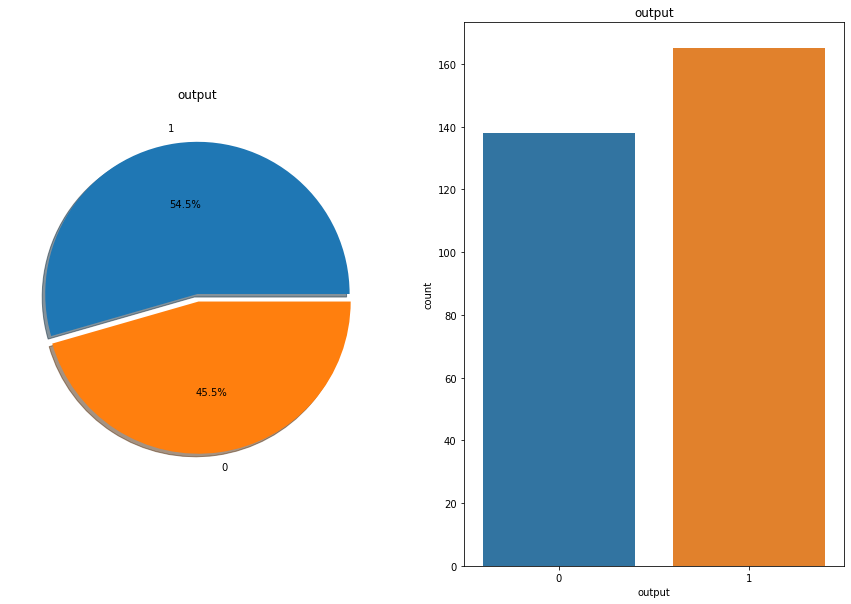

In [5]:
# EDA - 분석 목표(병 여부) 확인
data.output.value_counts()
print('\n 0(심장 질환 가능성 < 50%):',data.output.value_counts()[0],"\n",
      '1(심장 질환 가능성 > 50%):',data.output.value_counts()[1])


f, ax = plt.subplots(1, 2, figsize=(15, 10))

data['output'].value_counts().plot.pie(explode=[0, 0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)

ax[0].set_title('output')
ax[0].set_ylabel('')
sns.countplot('output', data=data, ax=ax[1])
ax[1].set_title('output')

# plt.title('output')
plt.show()


 Value 0: 공복 혈당 수치 > 120 mg/dl) (0 = false) 258 
 Value 1: 공복 혈당 수치 > 120 mg/dl) (1 = true) 45 

0    258
1     45
Name: fasting_blood_sugar, dtype: int64
----------------------------------------------------------------------------------------------------
258
45


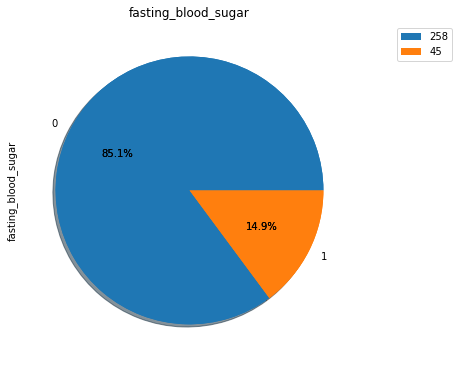

In [6]:
# data['fbs'].value_counts()
data['fasting_blood_sugar'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=0, shadow=True, figsize=(6,8))
print(
    '\n Value 0: 공복 혈당 수치 > 120 mg/dl) (0 = false)',data.fasting_blood_sugar.value_counts()[0],"\n",
    'Value 1: 공복 혈당 수치 > 120 mg/dl) (1 = true)',data.fasting_blood_sugar.value_counts()[1],"\n",)


print(data.fasting_blood_sugar.value_counts())
print('-'*100)
print(data.fasting_blood_sugar.value_counts()[0])
print(data.fasting_blood_sugar.value_counts()[1])

index = [data.fasting_blood_sugar.value_counts()[0], data.fasting_blood_sugar.value_counts()[1]]
# plt.figure(figsize=(5,5))
plt.title('fasting_blood_sugar')
# plt.pie(index, autopct='%1.1f%%')
# data['fbs'].value_counts().plot.pie(explode=[0, 0.05], autopct='%1.1f%%', ax=ax[0], shadow=True, startangle=0)
plt.pie(index, autopct='%1.1f%%')
# sns.countplot('fasting_blood_sugar', data=df, ax=ax[1])
plt.legend(index, bbox_to_anchor=(1.3, 1), loc='upper right')
plt.show()


 1(남자) : 207 
 0(여자) : 96


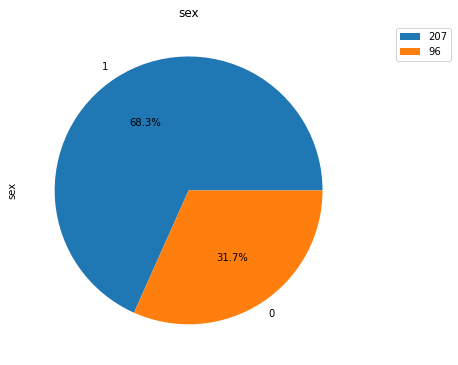

In [7]:
data['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=0, figsize=(6,8))
print('\n 1(남자) :',data.sex.value_counts()[1],"\n",
      '0(여자) :',data.sex.value_counts()[0])

plt.title('sex')
index = [data.sex.value_counts()[1], data.sex.value_counts()[0]]
plt.legend(index, bbox_to_anchor=(1.3, 1), loc='upper right')
plt.show()

### 0을 여자, 1을 남자로

In [6]:
data.loc[(data['sex'] ==1), 'sex'] = 'Man'
data.loc[(data['sex'] ==0), 'sex'] = 'Woman'

data.loc[(data['output'] ==1), 'output'] = 'High'
data.loc[(data['output'] ==0), 'output'] = 'Low'

data.head()

,age,sex,Chest_pain_type,blood_pressure,Cholestoral,fasting_blood_sugar,Resting_electrocardiographic_results,max_heart_rate,exercise,ST_depression,slope_of_the_peak_exercise_ST_segment,Num_of_major_vessels_colored_by_flourosopy,thall,output,o2Saturation
0,63,Man,3,145,233,1,0,150,0,2.3,0,0,1,High,98.6
1,37,Man,2,130,250,0,1,187,0,3.5,0,0,2,High,98.6
2,41,Woman,1,130,204,0,0,172,0,1.4,2,0,2,High,98.6
3,56,Man,1,120,236,0,1,178,0,0.8,2,0,2,High,98.1
4,57,Woman,0,120,354,0,1,163,1,0.6,2,0,2,High,97.5



 Value 0: typical angina(전형적 협심증)  = 143 
 Value 1: atypical angina(비정형 협심증) = 50 
 Value 2: non-anginal pain(협심증이 아닌 통증)= 87 
 Value 3: asymptomatic(무증상)    = 23
0    143
2     87
1     50
3     23
Name: Chest pain type, dtype: int64
143
50
87
23
----------------------


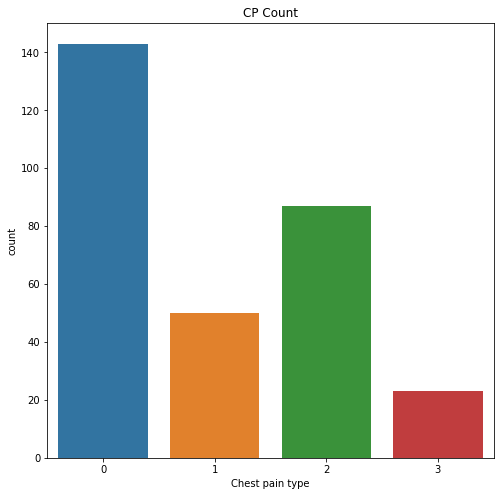

In [25]:
data['Chest pain type'].value_counts()
print(
    '\n Value 0: typical angina(전형적 협심증)  =',data['Chest pain type'].value_counts()[0],"\n",
      'Value 1: atypical angina(비정형 협심증) =',data['Chest pain type'].value_counts()[1],"\n",
      'Value 2: non-anginal pain(협심증이 아닌 통증)=',data['Chest pain type'].value_counts()[2],"\n",
      'Value 3: asymptomatic(무증상)    =',data['Chest pain type'].value_counts()[3])

print(data['Chest pain type'].value_counts())
print(data['Chest pain type'].value_counts()[0])
print(data['Chest pain type'].value_counts()[1])
print(data['Chest pain type'].value_counts()[2])
print(data['Chest pain type'].value_counts()[3])
print('----------------------')
plt.subplots(figsize=(8,8))
sns.countplot(data=data,x='Chest pain type') #,palette="pastel"
plt.title( 'CP Count')
plt.show()


 Value 0: none  = 2 
 Value 1: fixed defect(고정적 결함)  = 18 
 Value 2: normal = 166 
 Value 3: reversable defect(가역적 결함)= 117


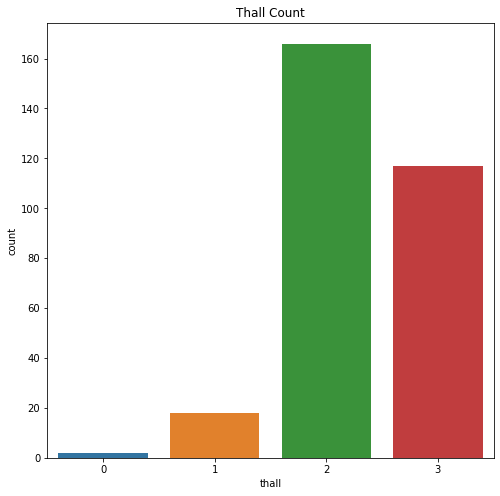

In [30]:
data['thall'].value_counts()
print(
    '\n Value 0: none  =',data['thall'].value_counts()[0],"\n",
      'Value 1: fixed defect(고정적 결함)  =',data['thall'].value_counts()[1],"\n",
      'Value 2: normal =',data['thall'].value_counts()[2],"\n",
      'Value 3: reversable defect(가역적 결함)=',data['thall'].value_counts()[3])

plt.subplots(figsize=(8,8))
sns.countplot(data=data,x='thall')
plt.title( 'Thall Count')
plt.show()

In [33]:
data.rename(columns={"98.6":"o2Saturation","trtbps":"blood_pressure","chol":"Cholestoral", 'cp':'Chest_pain_type',  
                     'restecg':'Resting_electrocardiographic_results',
                     'exng':'Exercise_induced_angina', 'oldpeak':'ST_depression','slp':'slope_of_the_peak_exercise_ST_segment',
                       'caa':'Num_of_major_vessels_colored_by_flourosopy',
                   "fbs":"fasting_blood_sugar","thalachh":"max_heart_rate","exng":"exercise"},inplace=True)

In [21]:
data.columns

Index(['age', 'sex', 'Chest pain type', 'blood_pressure', 'Cholestoral',
       'fasting_blood_sugar', 'Resting electrocardiographic results',
       'max_heart_rate', 'exercise', 'ST depression',
       'slope of the peak exercise ST segment',
       'No.of major vessels colored by flourosopy', 'thall', 'output',
       'o2Saturation'],
      dtype='object')


 slope of the peak exercise ST segment
 Value 0: 비경사  = 21 
 Value 1: 플랫  = 140 
 Value 2: 내리막 = 142 



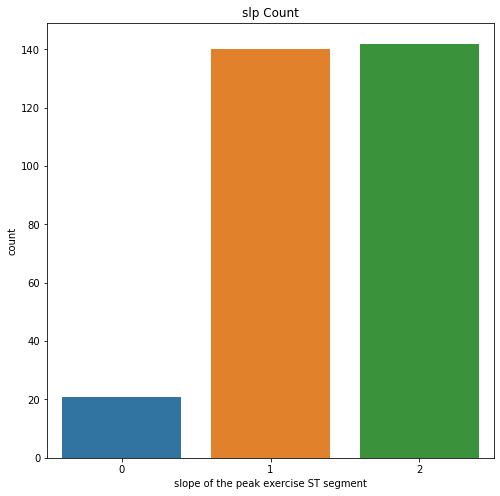

In [35]:
data['slope of the peak exercise ST segment'].value_counts()
print(
    '\n slope of the peak exercise ST segment'
    '\n Value 0: 비경사  =', data['slope of the peak exercise ST segment'].value_counts()[0],"\n",
      'Value 1: 플랫  =',data['slope of the peak exercise ST segment'].value_counts()[1],"\n",
      'Value 2: 내리막 =',data['slope of the peak exercise ST segment'].value_counts()[2],"\n")

plt.subplots(figsize=(8,8))
sns.countplot(data=data,x='slope of the peak exercise ST segment')
plt.title('slp Count')
plt.show()

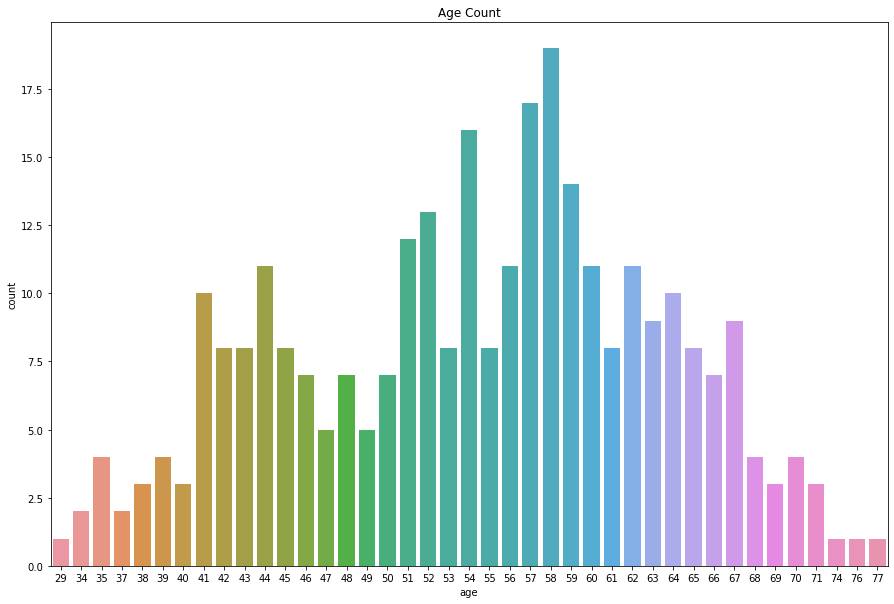

In [14]:
plt.subplots(figsize=(15,10))
sns.countplot(data=data,x='age')
plt.title( 'Age Count')
plt.show()

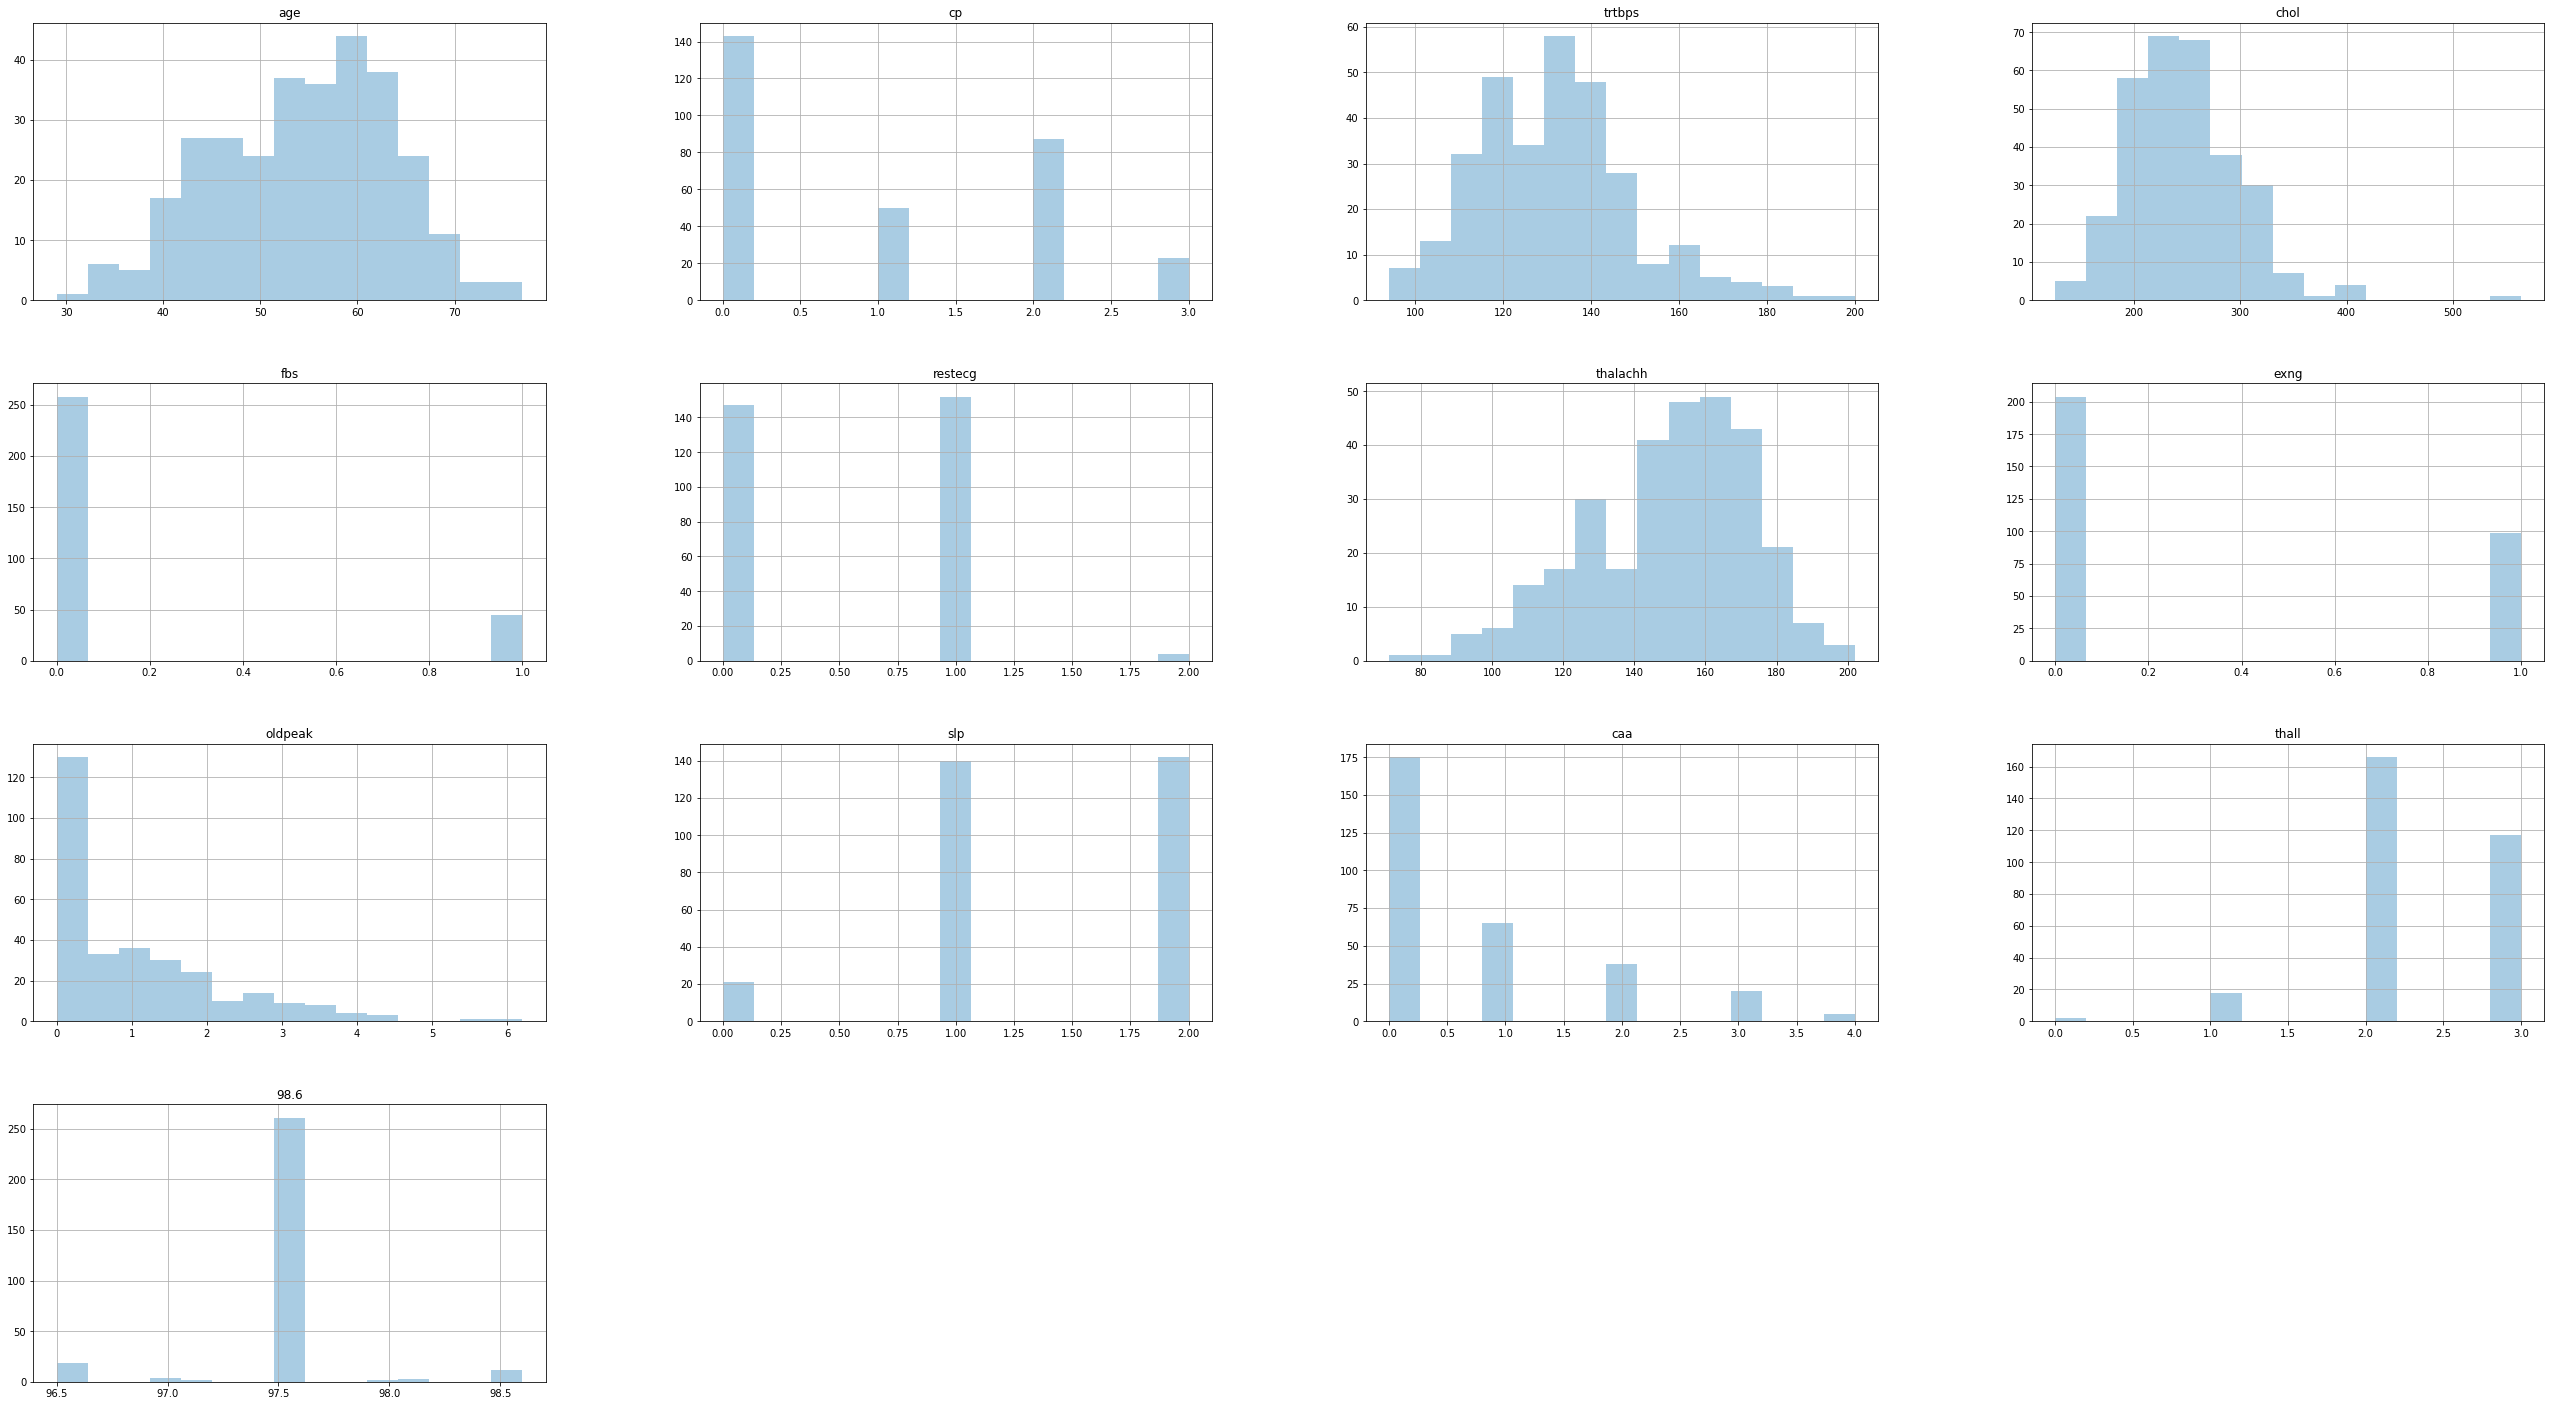

In [15]:
color = '#a9cce3'
data.hist(bins=15,figsize=(45,25),color=color)
plt.rcParams['font.size'] = 5
plt.show()

In [194]:
# 데이터 columns 이름 보기 쉽게 변경
data.rename(columns={"98.6":"o2Saturation","trtbps":"blood_pressure","chol":"Cholestoral", 'cp':'Chest pain type',  
                     'restecg':'Resting electrocardiographic results','thalachh':'Maximum heart rate',
                     'exng':'Exercise induced angina', 'oldpeak':'ST depression','slp':'slope of the peak exercise ST segment',
                       'caa':'No.of major vessels colored by flourosopy',
                   "fbs":"fasting_blood_sugar","thalachh":"max_heart_rate","exng":"exercise"},inplace=True)

In [17]:
data.corr()

,age,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,98.6
age,1.000000,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,0.019479
cp,-0.068653,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.136100
trtbps,0.279351,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,0.045749
chol,0.213678,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.030027
fbs,0.121308,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.054655
restecg,-0.116211,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.070147
thalachh,-0.398522,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.149697
exng,0.096801,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.081410
oldpeak,0.210013,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,0.017763
slp,-0.168814,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,-0.044691


In [18]:
### 이름 바꾸기 전
data_numerical = data[['age','trtbps','chol','thalachh','oldpeak']] # not including slope as i don't think its useful
data_categorical = data[['sex','cp','fbs','restecg','exng','caa','thall','output']]

In [19]:
# ### 이름 바꾸고 난 후 
# data_numerical = data[['age','blood_pressure','Cholestoral', 'max_heart_rate', 'ST depression']]
# data_categorical = data[['sex','Chest pain type','Resting electrocardiographic results', 
#                          'fasting_blood_sugar','exercise','No.of major vessels colored by flourosopy',
#                          'slope of the peak exercise ST segment', 'thall',  'output']]

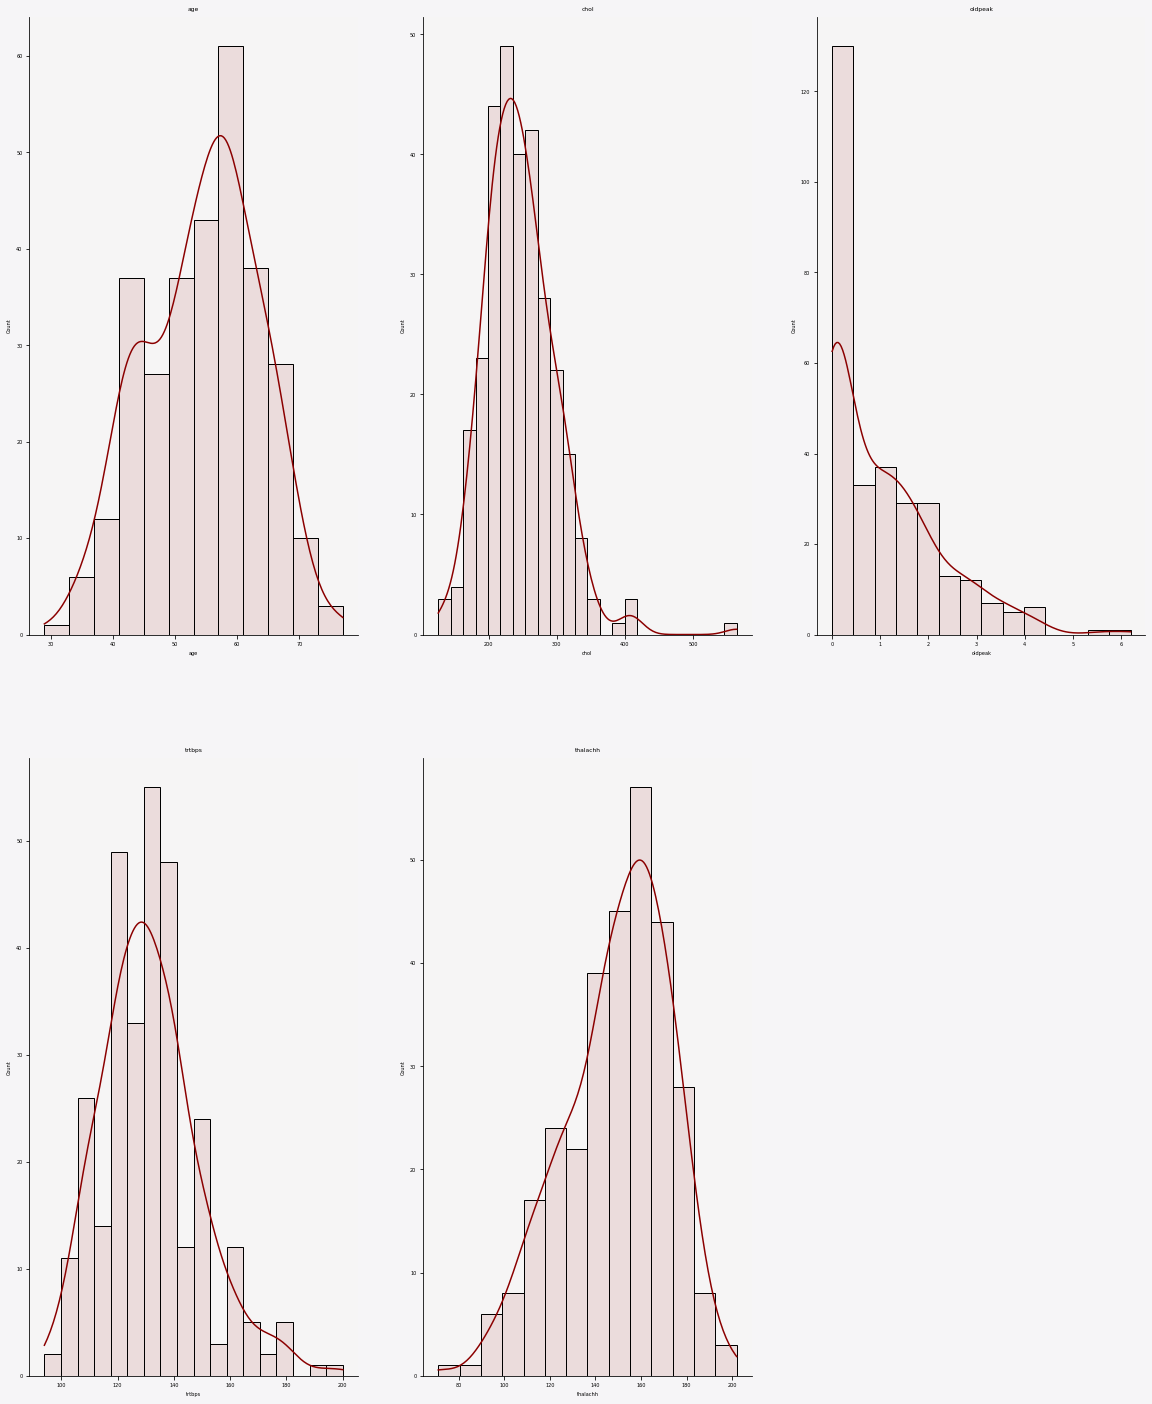

In [20]:
#### data_numerical
fig,ax=plt.subplots(2,3,figsize=(20,25))
fig.patch.set_facecolor('#f6f5f7')

for i,idx in enumerate(data_numerical.columns):
    sns.histplot(ax=ax[i%2,i//2],x=data_numerical[idx],color='darkred',kde=True,alpha=0.1)
    ax[i%2,i//2].set_title(idx)
    ax[i%2,i//2].set_facecolor('#f6f5f5')
    
    for z in ["top","right"]:
        ax[i%2,i//2].spines[z].set_visible(False)
ax[1,2].set_visible(False)

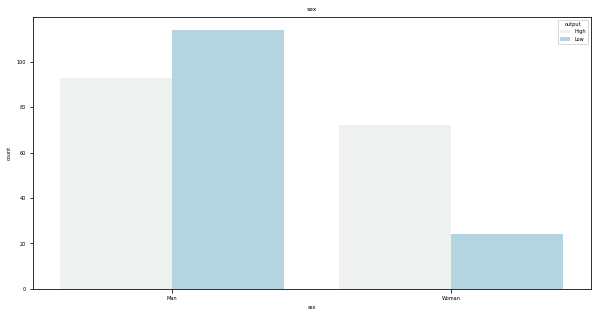

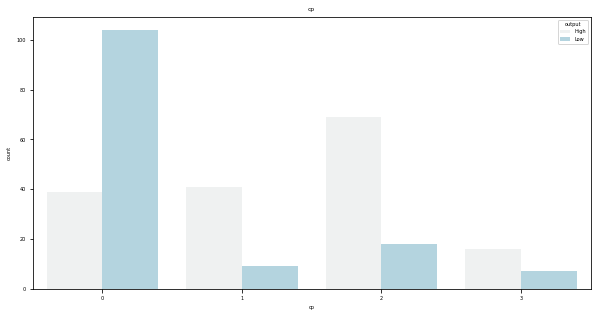

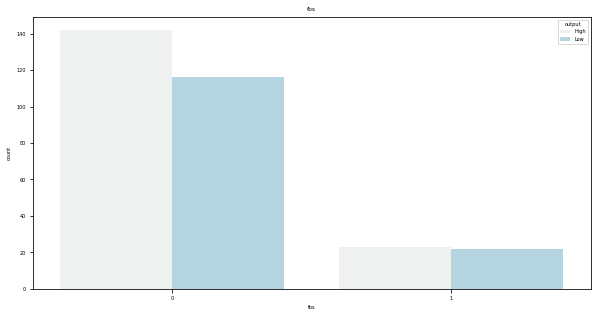

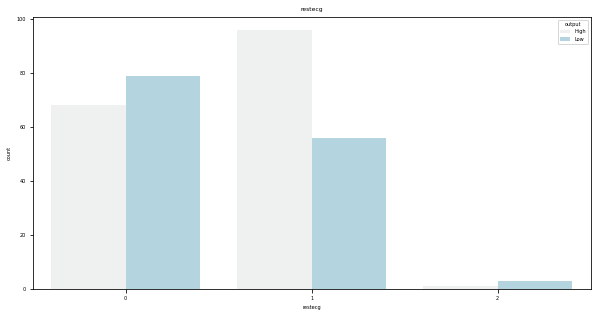

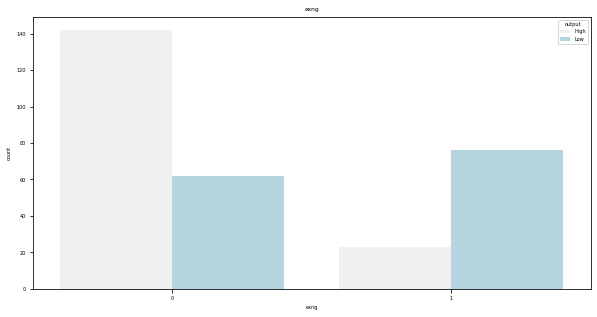

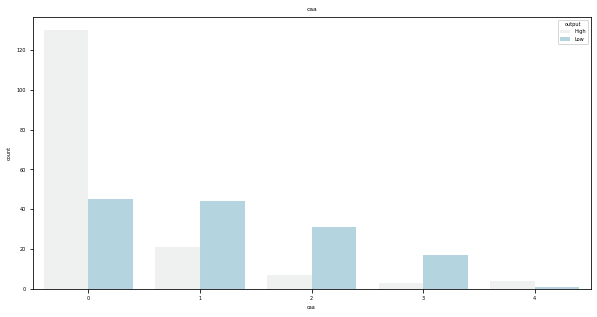

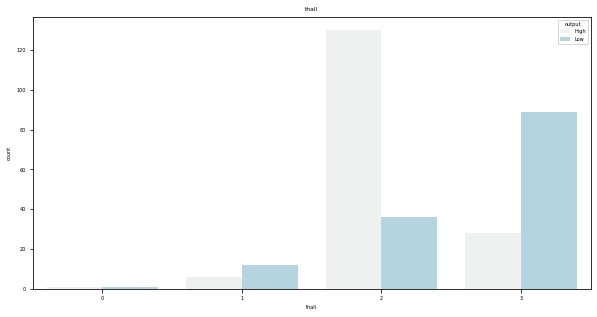

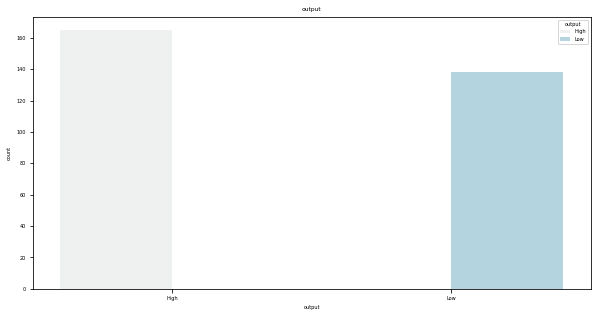

In [21]:
##### data_categorical
data_categoric = data_categorical.loc[:]
for i in data_categoric:
#     plt.
    plt.figure(figsize=(10,5))
    sns.countplot(x = i, data = data_categoric, hue = "output", color='lightblue')
    plt.title(i)

In [22]:
data.corr()

,age,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,98.6
age,1.000000,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,0.019479
cp,-0.068653,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.136100
trtbps,0.279351,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,0.045749
chol,0.213678,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.030027
fbs,0.121308,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.054655
restecg,-0.116211,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.070147
thalachh,-0.398522,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.149697
exng,0.096801,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.081410
oldpeak,0.210013,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,0.017763
slp,-0.168814,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,-0.044691


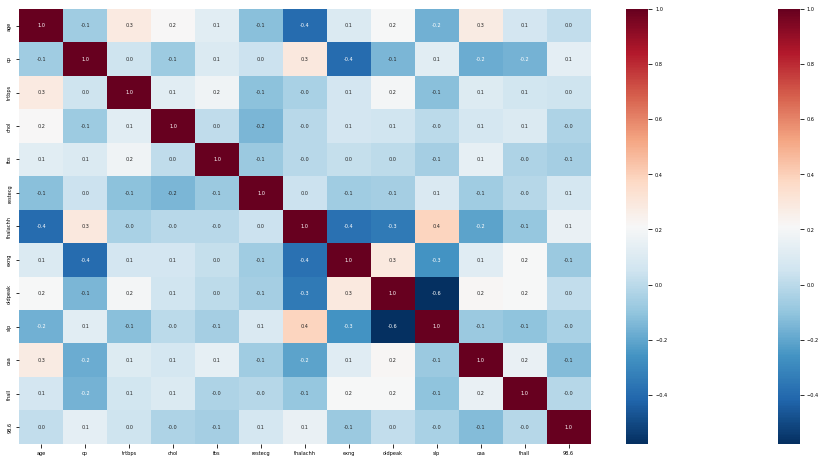

In [23]:
plt.figure(figsize= (16, 8))
sns.heatmap(data.corr(), annot = True, cmap= 'RdBu_r', fmt= '.1f');
sns.heatmap(data.corr(), cmap= 'RdBu_r');

['Malgun gothic']


Text(-1.7, 1.1, 'Numerical Variables의 히트맵')

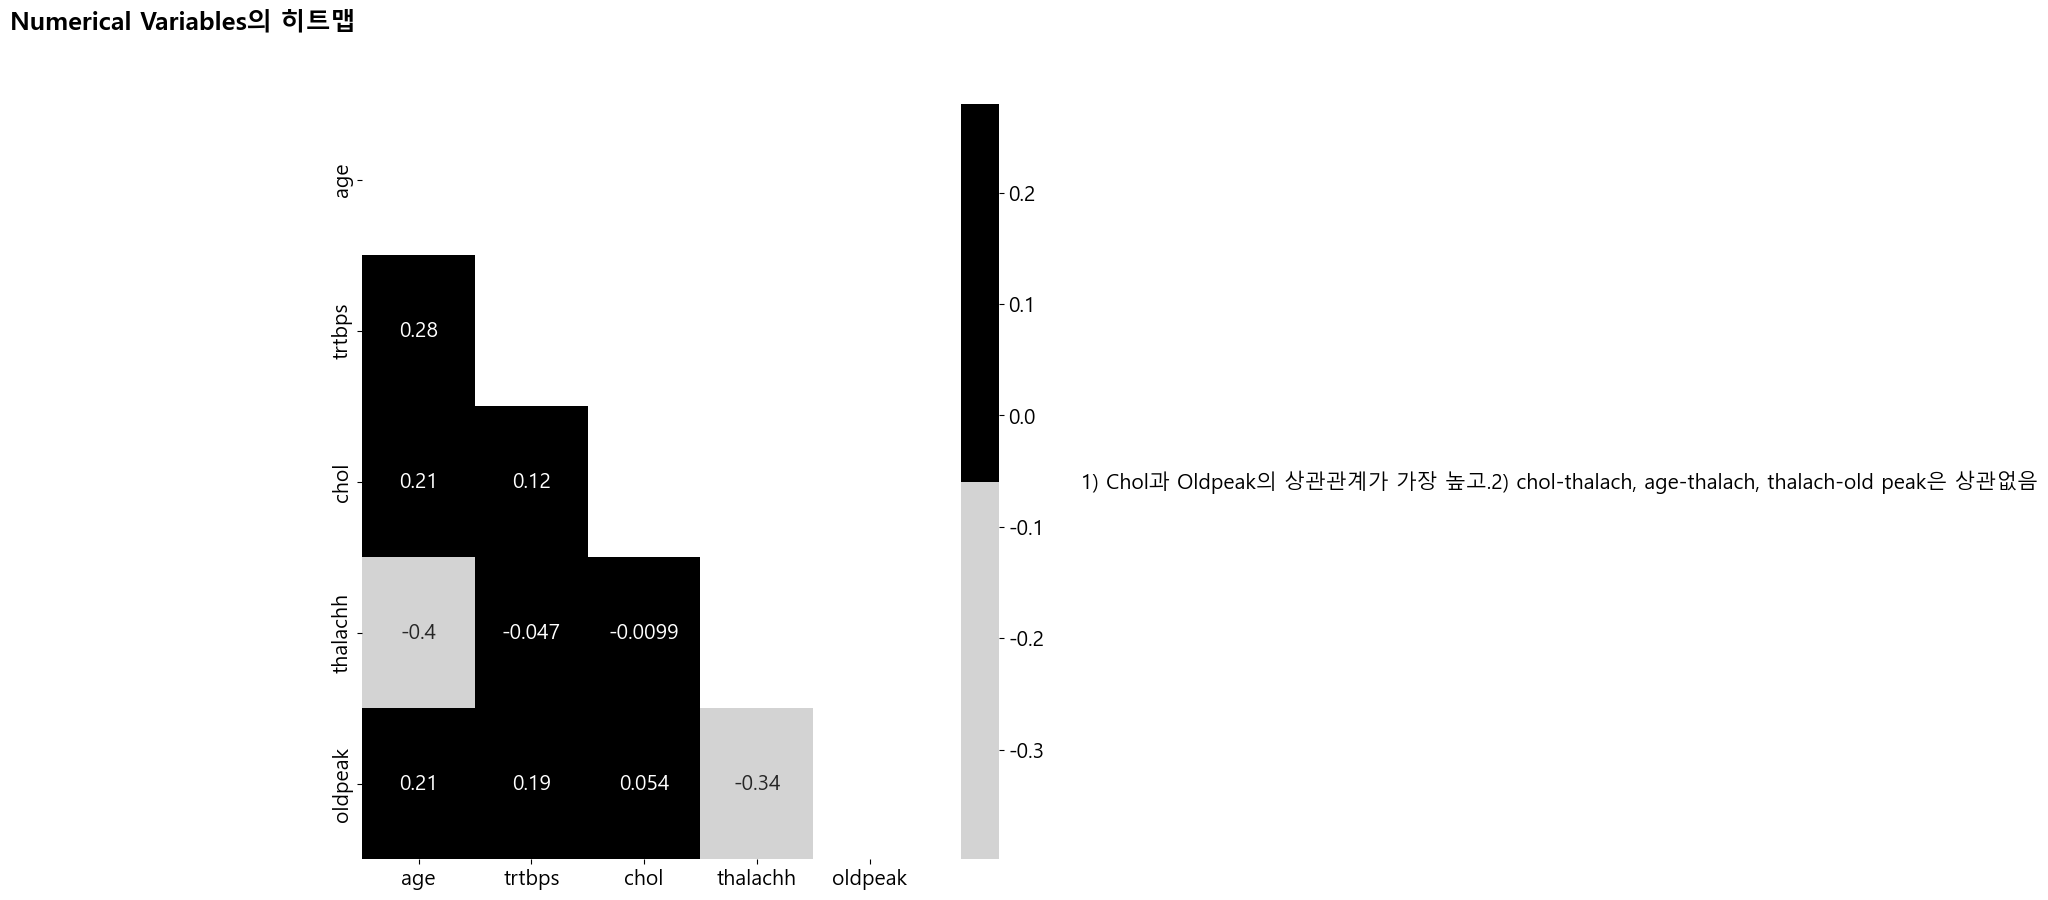

In [24]:
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams['figure.figsize'] = (20, 20)

plt.rc('font', family='NanumGothic')
plt.rcParams['font.family'] = 'Malgun gothic'
plt.rcParams.update({'font.size': 15})
print(plt.rcParams['font.family'])



fig=plt.figure(figsize=(20, 10),dpi=100)
gs=fig.add_gridspec(1,2)

# adding subplots
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
# background_color = '#f6f5f7'

# changing background color of our plots
# for i in axes:
#     i.set_facecolor(background_color)

# changing the figure background color
# fig.patch.set_facecolor(background_color) 

# heatmap of numerical data
matrix = np.triu(data_numerical.corr())
colors=['lightgray', 'black']
sns.heatmap(ax=ax0,data=data_numerical.corr(), annot=True, mask=matrix,cmap=colors)
ax1.text(0.5,0.5,'1) Chol과 Oldpeak의 상관관계가 가장 높고.' '2) chol-thalach, age-thalach, thalach-old peak은 상관없음',
         horizontalalignment = 'center',verticalalignment = 'center',fontsize = 15,fontfamily='Malgun gothic')
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(left=False, bottom=False)
for i in ["top","right","bottom","left"]:
    ax1.spines[i].set_visible(False)
plt.text(-1.7,1.1,'Numerical Variables의 히트맵',fontsize=18,fontweight='bold',fontfamily='Malgun gothic')   

In [25]:
# # 데이터 columns 이름 보기 쉽게 변경
# data.rename(columns={"98.6":"o2Saturation","trtbps":"blood_pressure","chol":"Cholestoral", 'cp':'Chest pain type',  
#                      'restecg':'Resting electrocardiographic results','thalachh':'Maximum heart rate',
#                      'exng':'Exercise induced angina', 'oldpeak':'ST depression','slp':'slope of the peak exercise ST segment',
#                        'caa':'No.of major vessels colored by flourosopy',
#                    "fbs":"fasting_blood_sugar","thalachh":"max_heart_rate","exng":"exercise"},inplace=True)

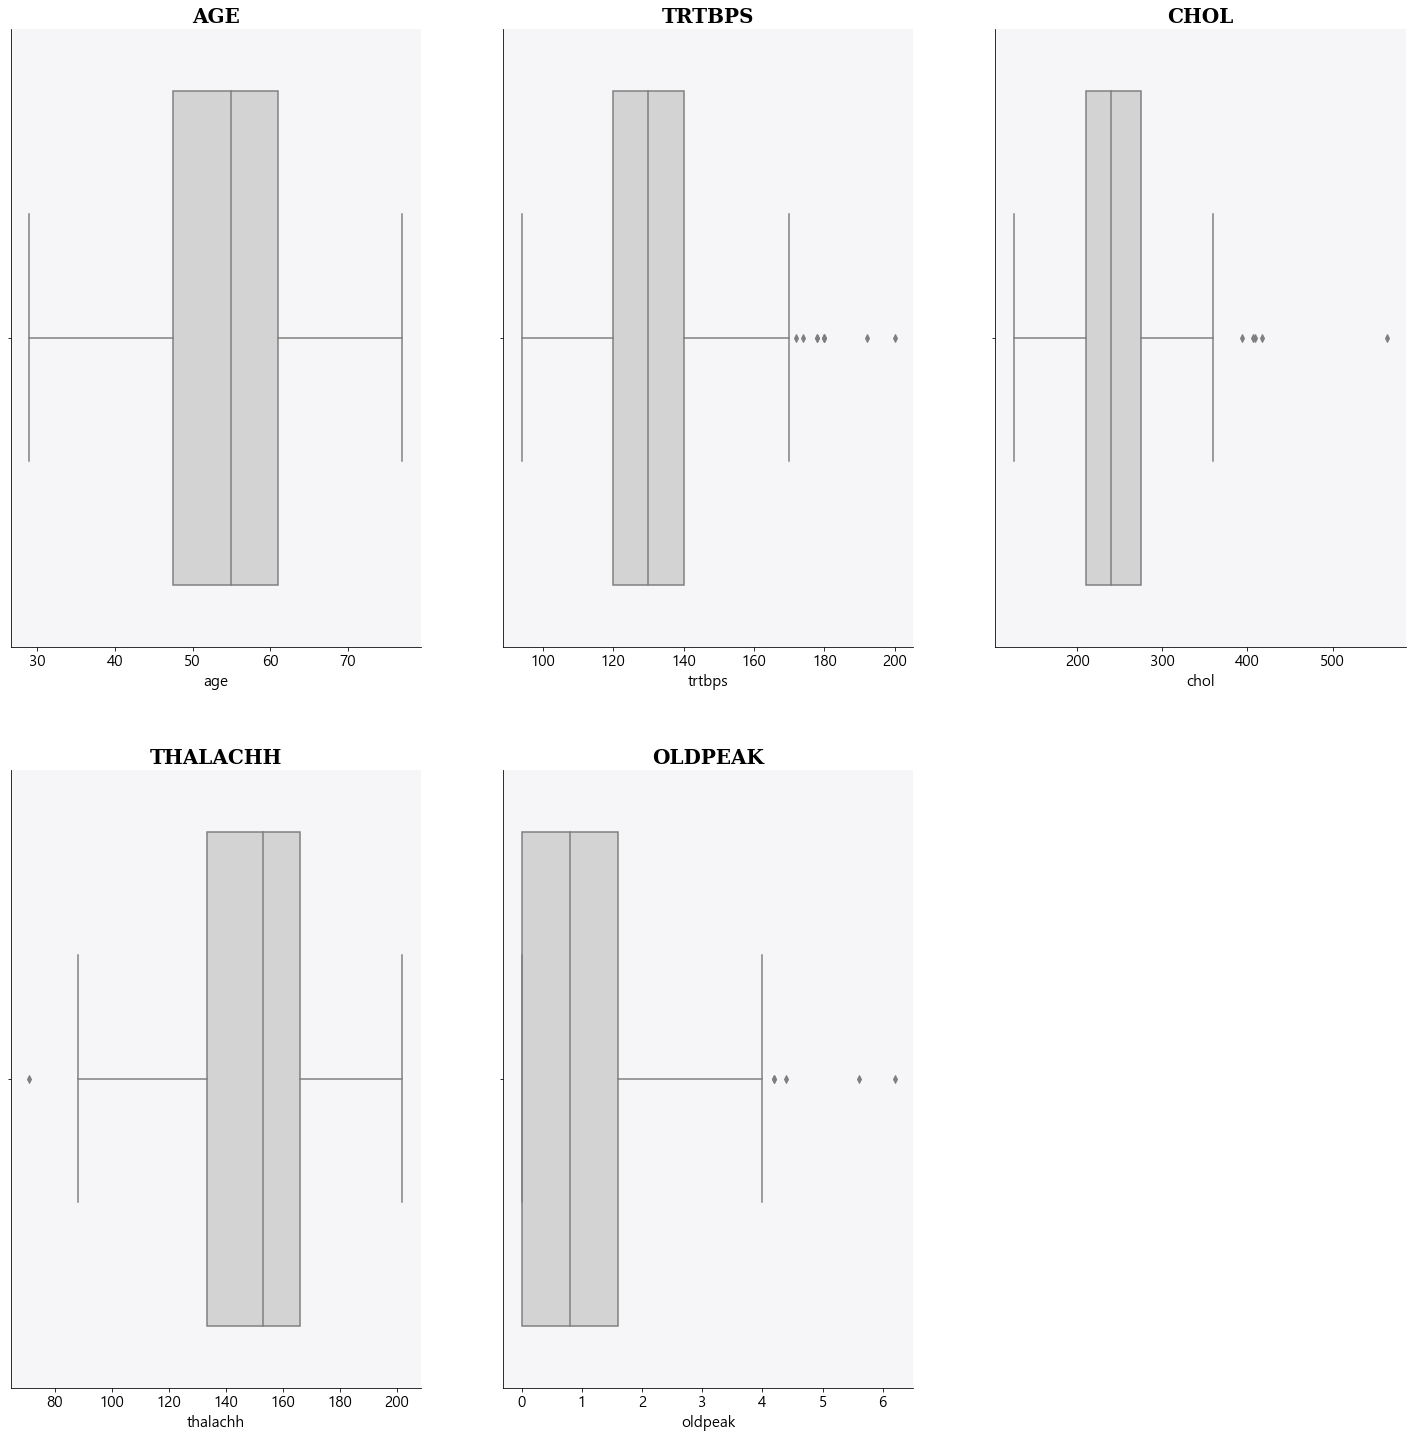

In [26]:
plt.figure(figsize=(25,25))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for idx,val in enumerate(data_numerical.columns):
    ax=plt.subplot(2,3,idx+1)
    sns.boxplot(data_numerical[val],palette=colors)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(),fontweight='bold',fontfamily='serif', fontsize=20)
    for i in ['top','right']:
        ax.spines[i].set_visible(False)

##########Cholesterol , Old peak , Resting bp have outliers. We standardize our data so we can ignore them

# Data Preprocessing for training

In [27]:
# Before training the models we are going to drop the slope and target columns.
# 이름 바꾸기 전
data_target=data['output']
data.drop(columns=['slp','output'],inplace=True)

In [28]:
# # Before training the models we are going to drop the slope and target columns. 
# # 이름 바꾸고 난 후
# data_target=data['output']
# data.drop(columns=['slope of the peak exercise ST segment','output'],inplace=True)

In [29]:
# # 데이터 columns 이름 보기 쉽게 변경
# data.rename(columns={"98.6":"o2Saturation","trtbps":"blood_pressure","chol":"Cholestoral", 'cp':'Chest pain type',  
#                      'restecg':'Resting electrocardiographic results','thalachh':'Maximum heart rate',
#                      'exng':'Exercise induced angina', 'oldpeak':'ST depression','slp':'slope of the peak exercise ST segment',
#                        'caa':'No.of major vessels colored by flourosopy',
#                    "fbs":"fasting_blood_sugar","thalachh":"max_heart_rate","exng":"exercise"},inplace=True)

In [30]:
# One-Hot encoding of Categorical Variables
data_dummies=data[['sex','cp','fbs','restecg','exng','caa','thall']]
data_dummies= pd.get_dummies(data_dummies,columns=['sex','cp','fbs','restecg','exng','caa','thall'])

In [31]:
print(data_numerical.columns)
print(data_categorical.columns)

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'], dtype='object')
Index(['sex', 'cp', 'fbs', 'restecg', 'exng', 'caa', 'thall', 'output'], dtype='object')


In [32]:
data_dummies

,sex_Man,sex_Woman,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,...,exng_1,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,1,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,0,1,1,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,1,1,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
299,1,0,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300,1,0,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
301,1,0,1,0,0,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1


In [33]:
# Merging the dummy variables and our original data
data.drop(columns=['sex','cp','fbs','restecg','exng','caa','thall'],inplace=True)
data=data.merge(data_dummies,left_index=True, right_index=True,how='left')
data

,age,trtbps,chol,thalachh,oldpeak,98.6,sex_Man,sex_Woman,cp_0,cp_1,...,exng_1,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,98.6,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,98.6,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,98.6,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,98.1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,97.5,0,1,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,97.5,0,1,1,0,...,1,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,97.5,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,97.5,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,97.5,1,0,1,0,...,1,0,1,0,0,0,0,0,0,1


In [154]:
# Splitting the data into training and testing sets.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data,data_target,test_size=0.3,random_state=42)

In [155]:
# Standardizing the training and testing data.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Training and Prediction

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

colors=['blue','whiteblue']
def Model(model):
#     fig, ax = plt.subplots(figsize=(10, 10))
#     plt.figure(figsize=(15, 15))
#     plt.subplots(122)
#     fig, ax = plt.subplots(figsize=(10,10))
    plt.rcParams.update({'font.size': 45})
    model.fit(X_train,y_train)
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)
    cm = confusion_matrix(y_test,prediction)
    print('훈련 세트 정확도:', score_train)
    print('테스트 세트 정확도:',score_test)
    plot_confusion_matrix(model,X_test,y_test,cmap='rocket_r')
    metrics.plot_roc_curve(model, X_test, y_test)    

훈련 세트 정확도: 0.8867924528301887
테스트 세트 정확도: 0.8901098901098901


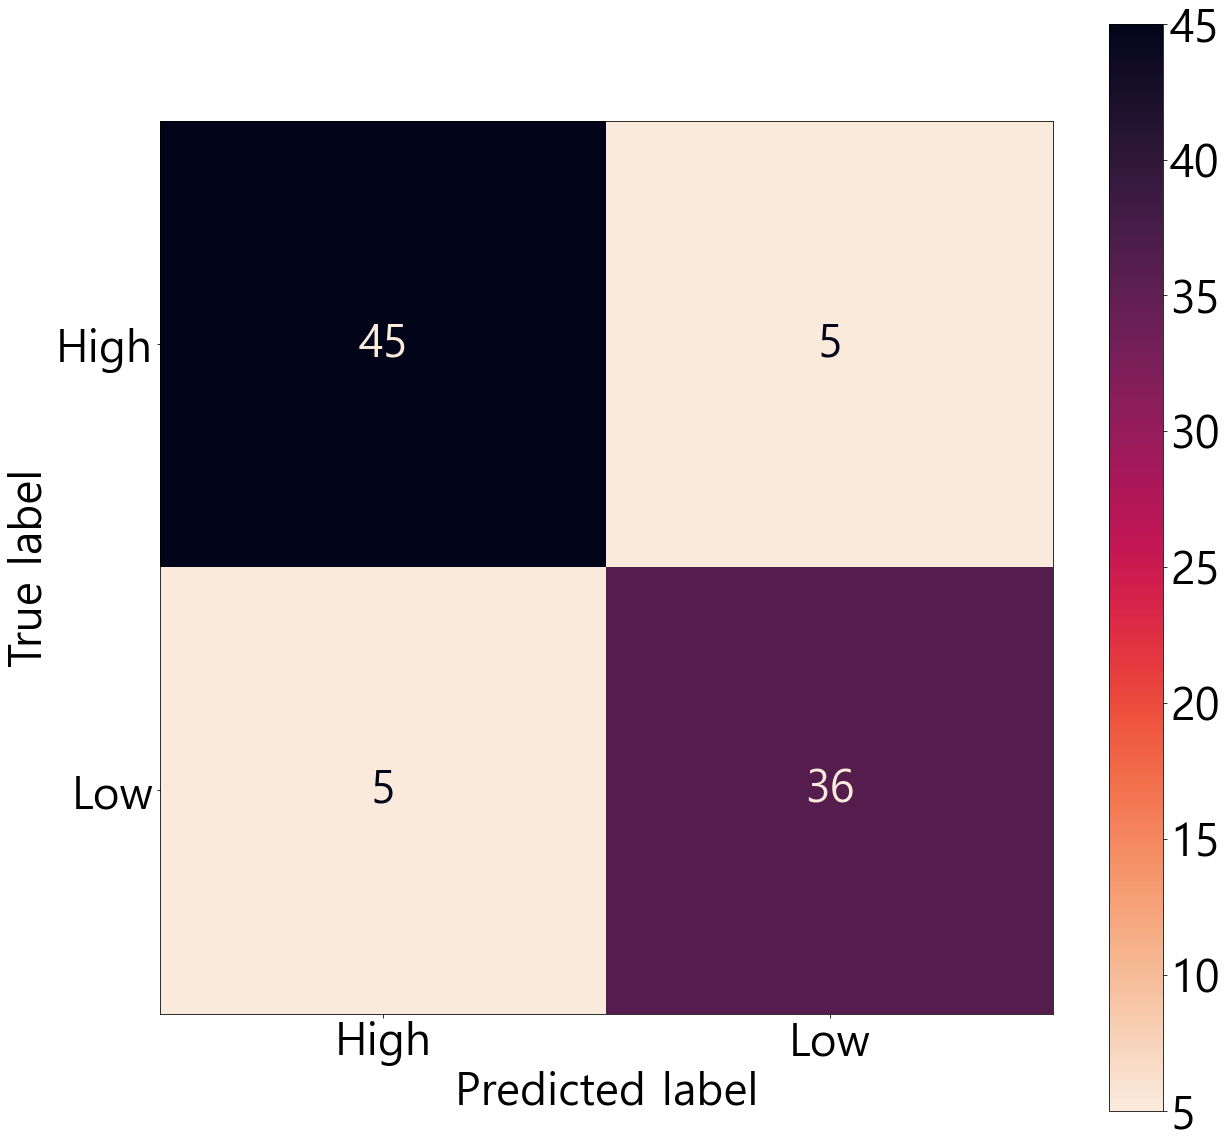

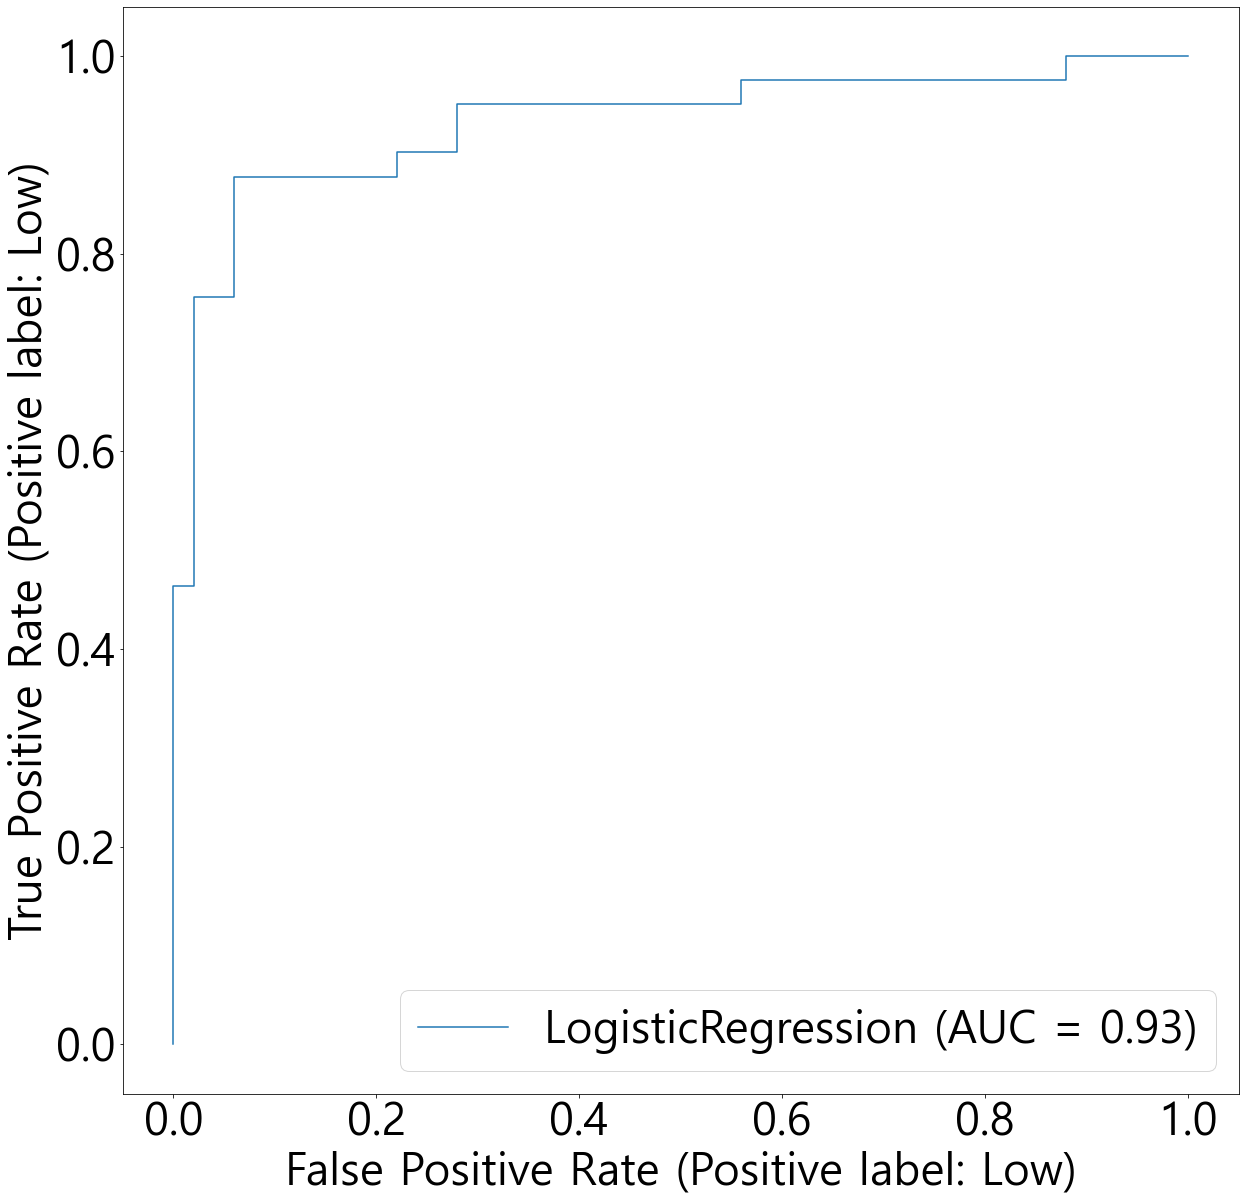

In [161]:
# Logistic Regression
lg_reg=LogisticRegression()

Model(lg_reg)

훈련 세트 정확도: 1.0
테스트 세트 정확도: 0.7252747252747253


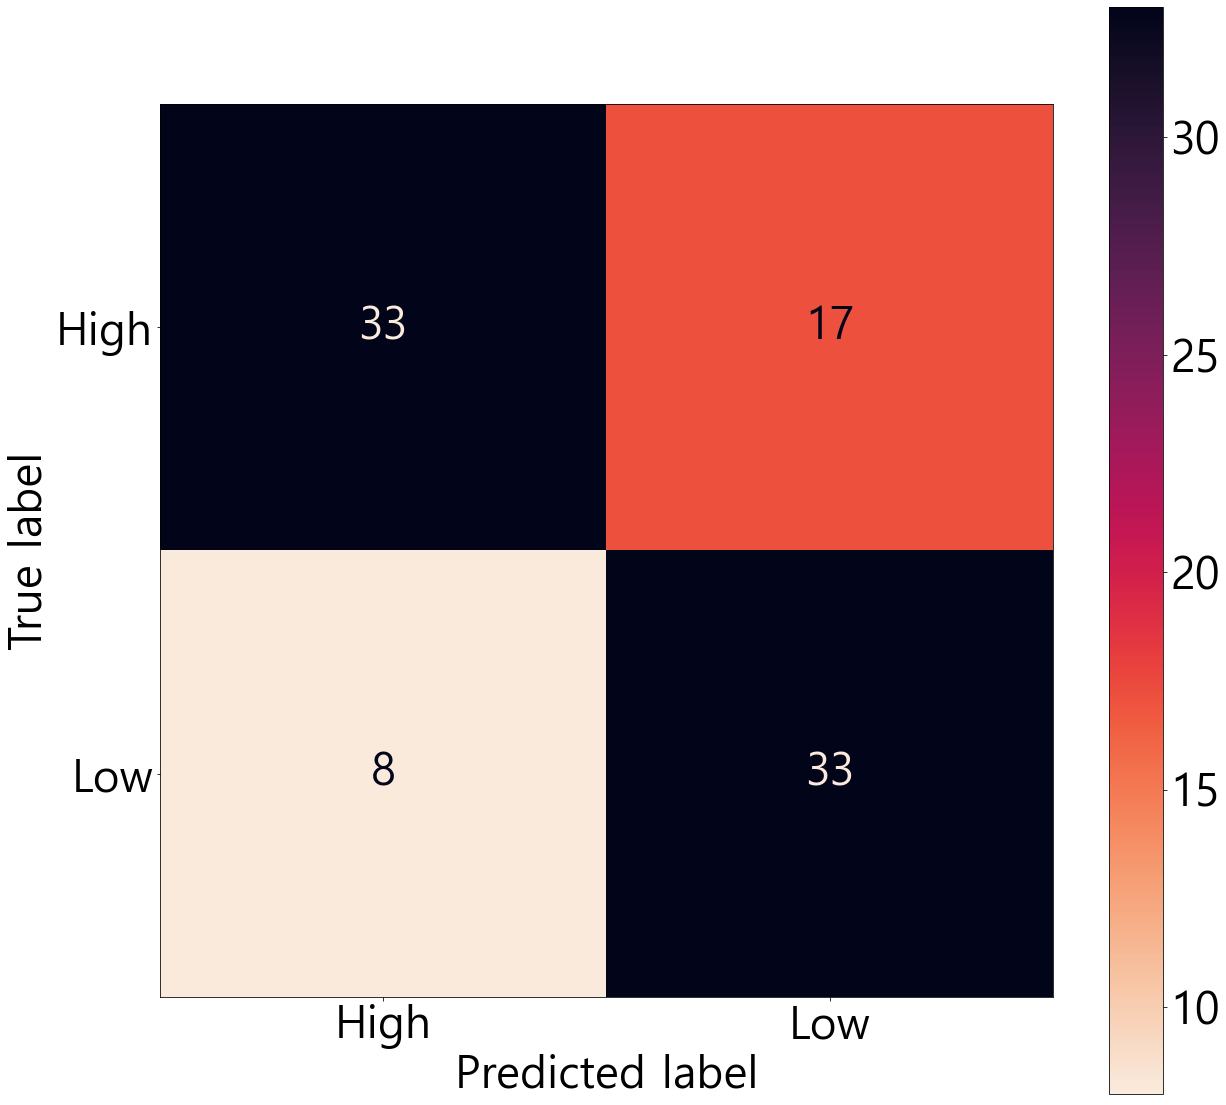

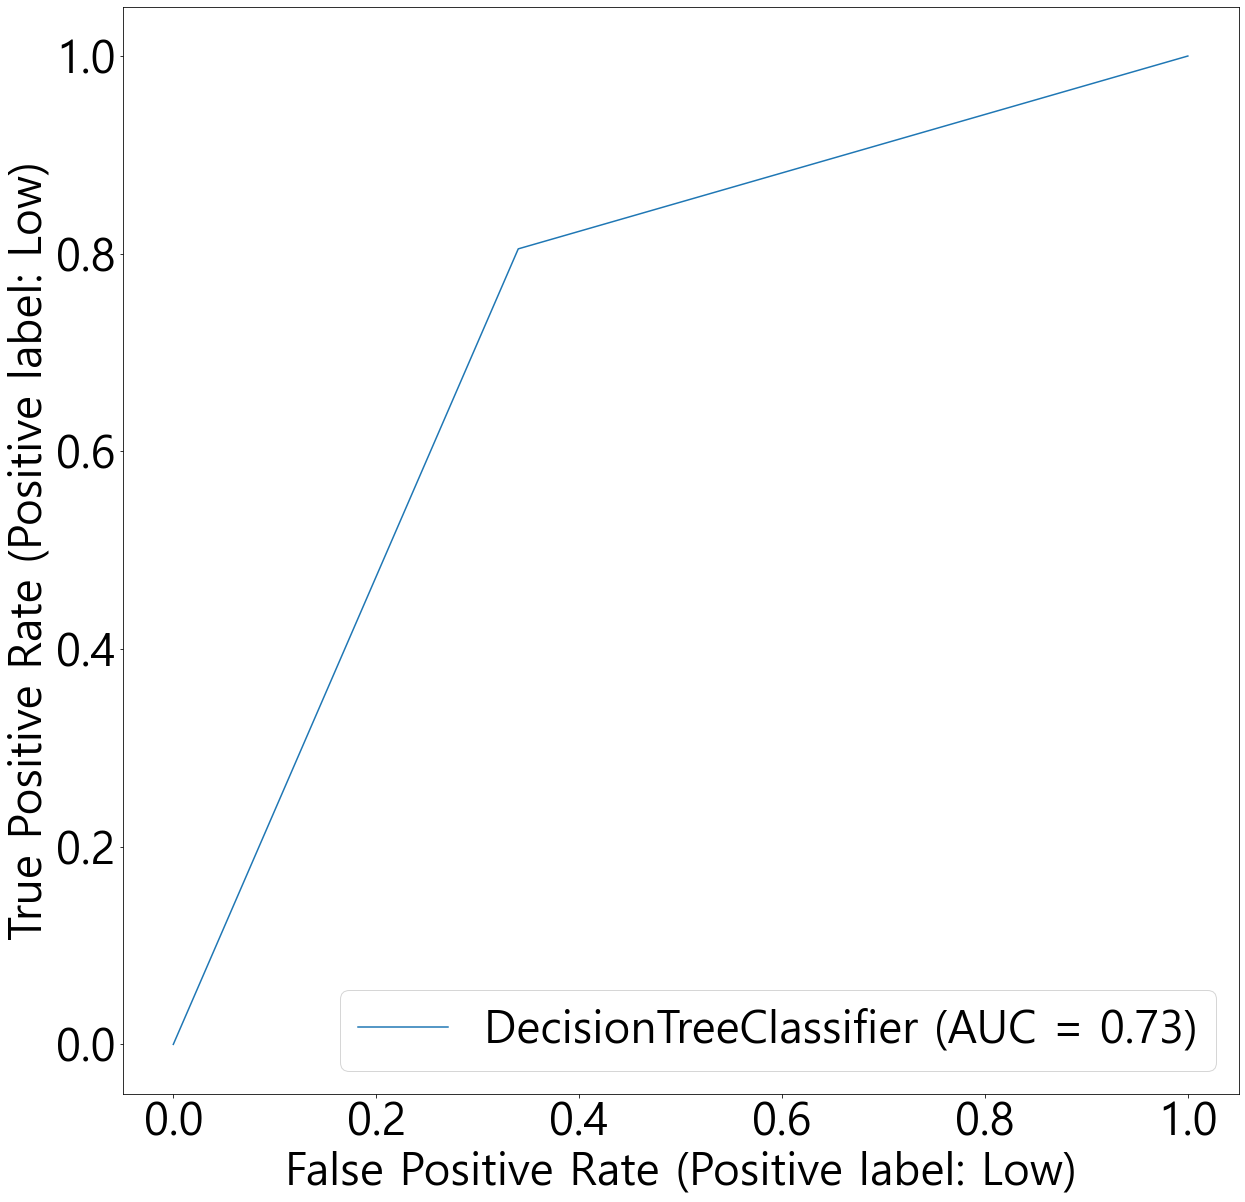

In [162]:
# Decision Tree Classification
d_classif= DecisionTreeClassifier()
Model(d_classif)

훈련 세트 정확도: 1.0
테스트 세트 정확도: 0.8461538461538461


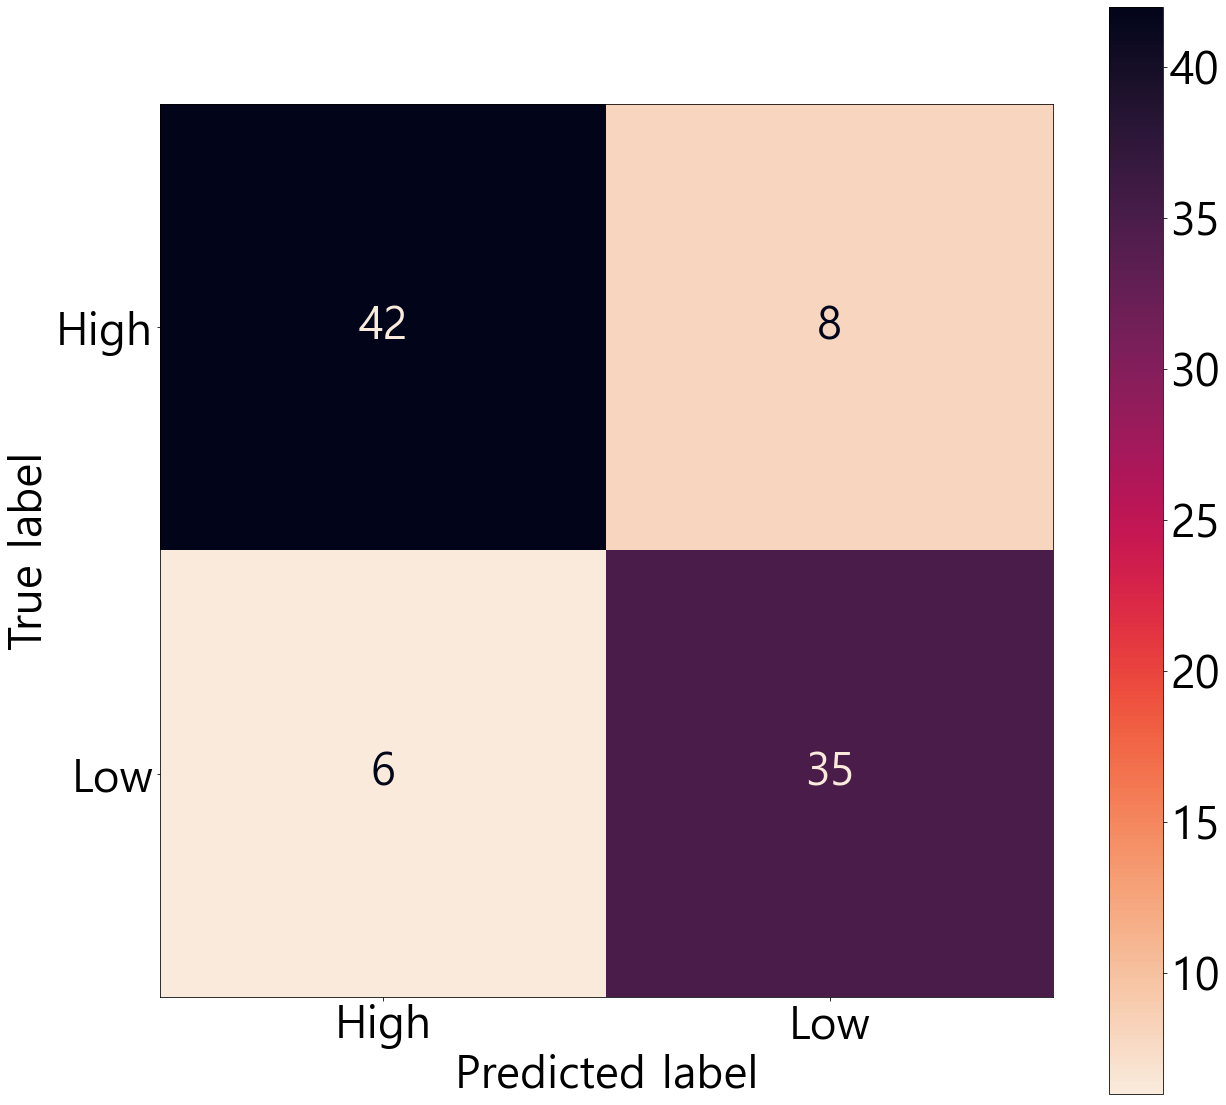

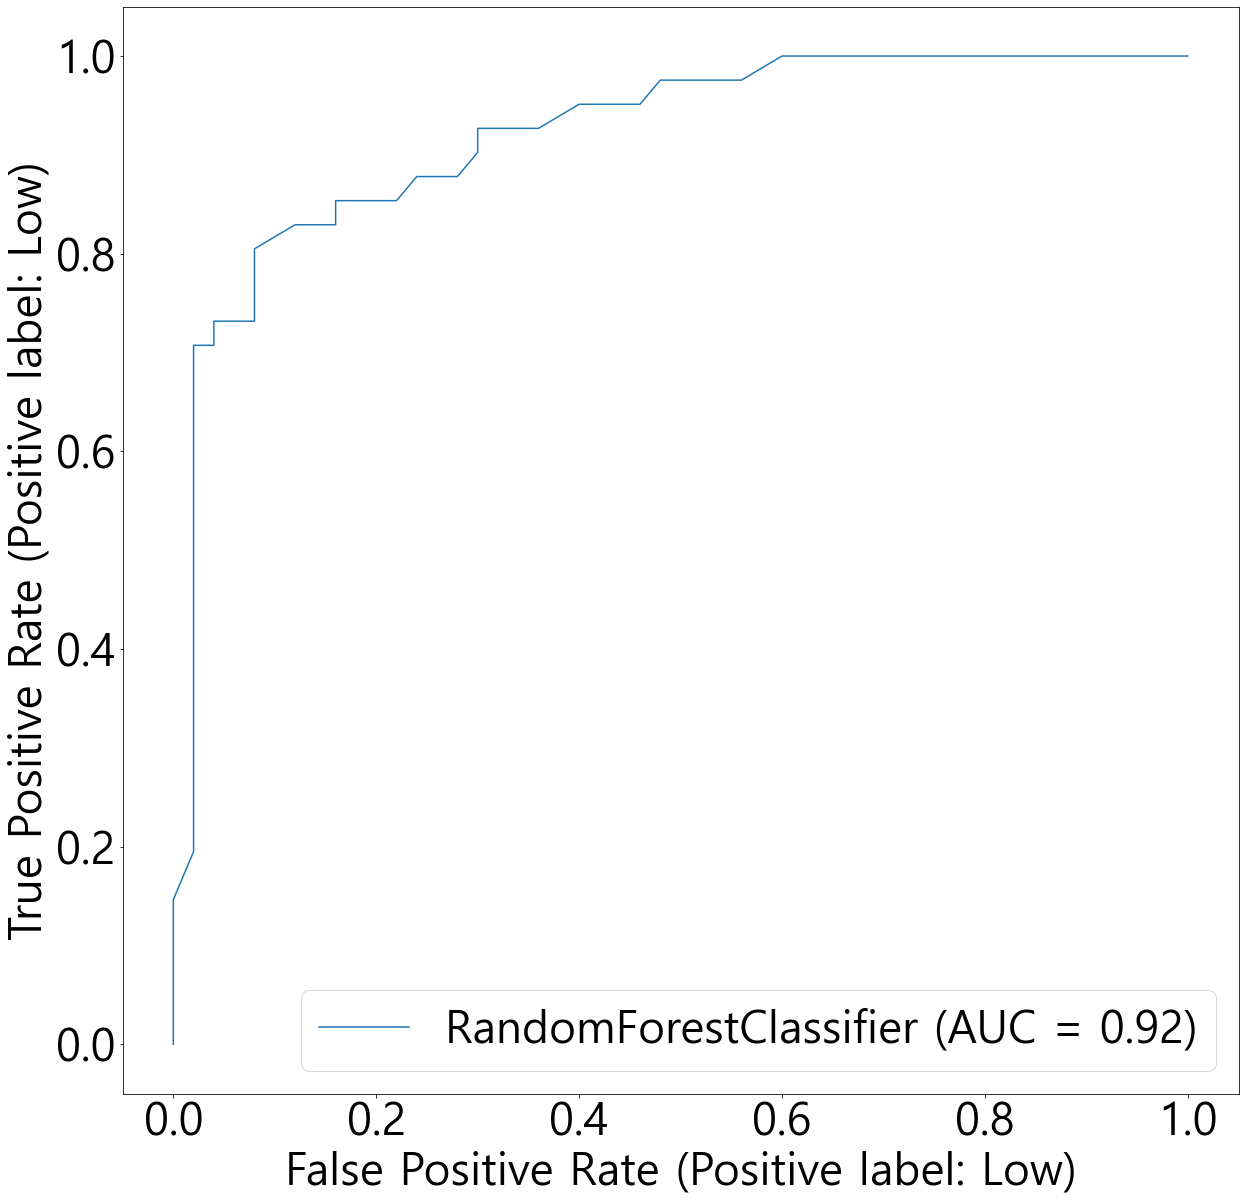

In [163]:
#Regression Trees
reg_tree = RandomForestClassifier()
Model(reg_tree)

훈련 세트 정확도: 0.9245283018867925
테스트 세트 정확도: 0.8461538461538461


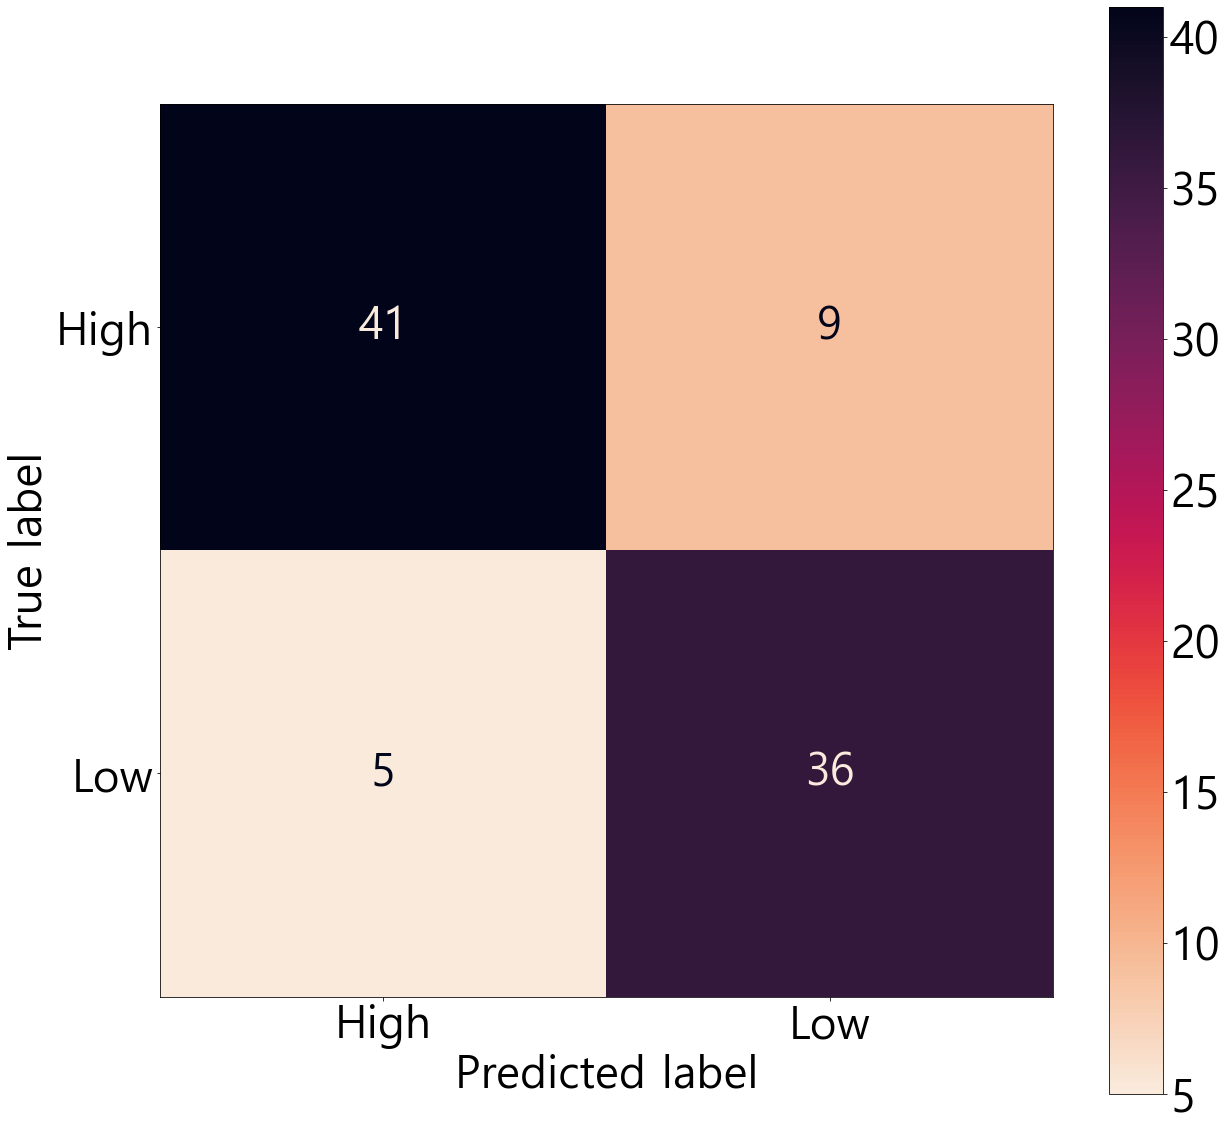

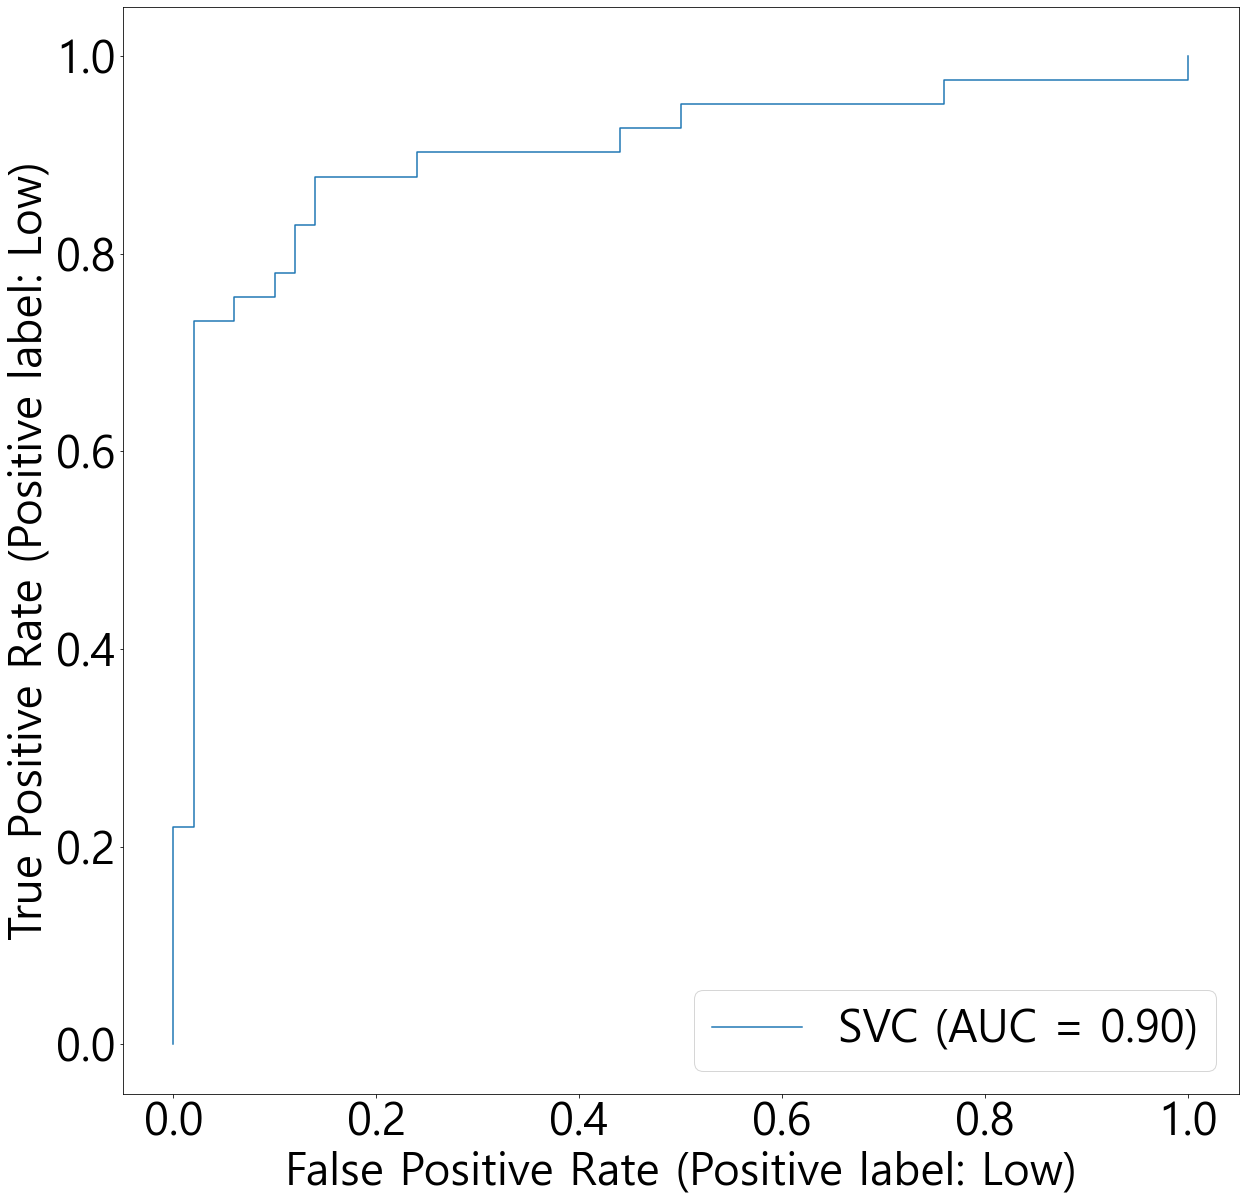

In [164]:
#SVM\
SVM = svm.SVC()
Model(SVM)

훈련 세트 정확도: 1.0
테스트 세트 정확도: 0.8461538461538461


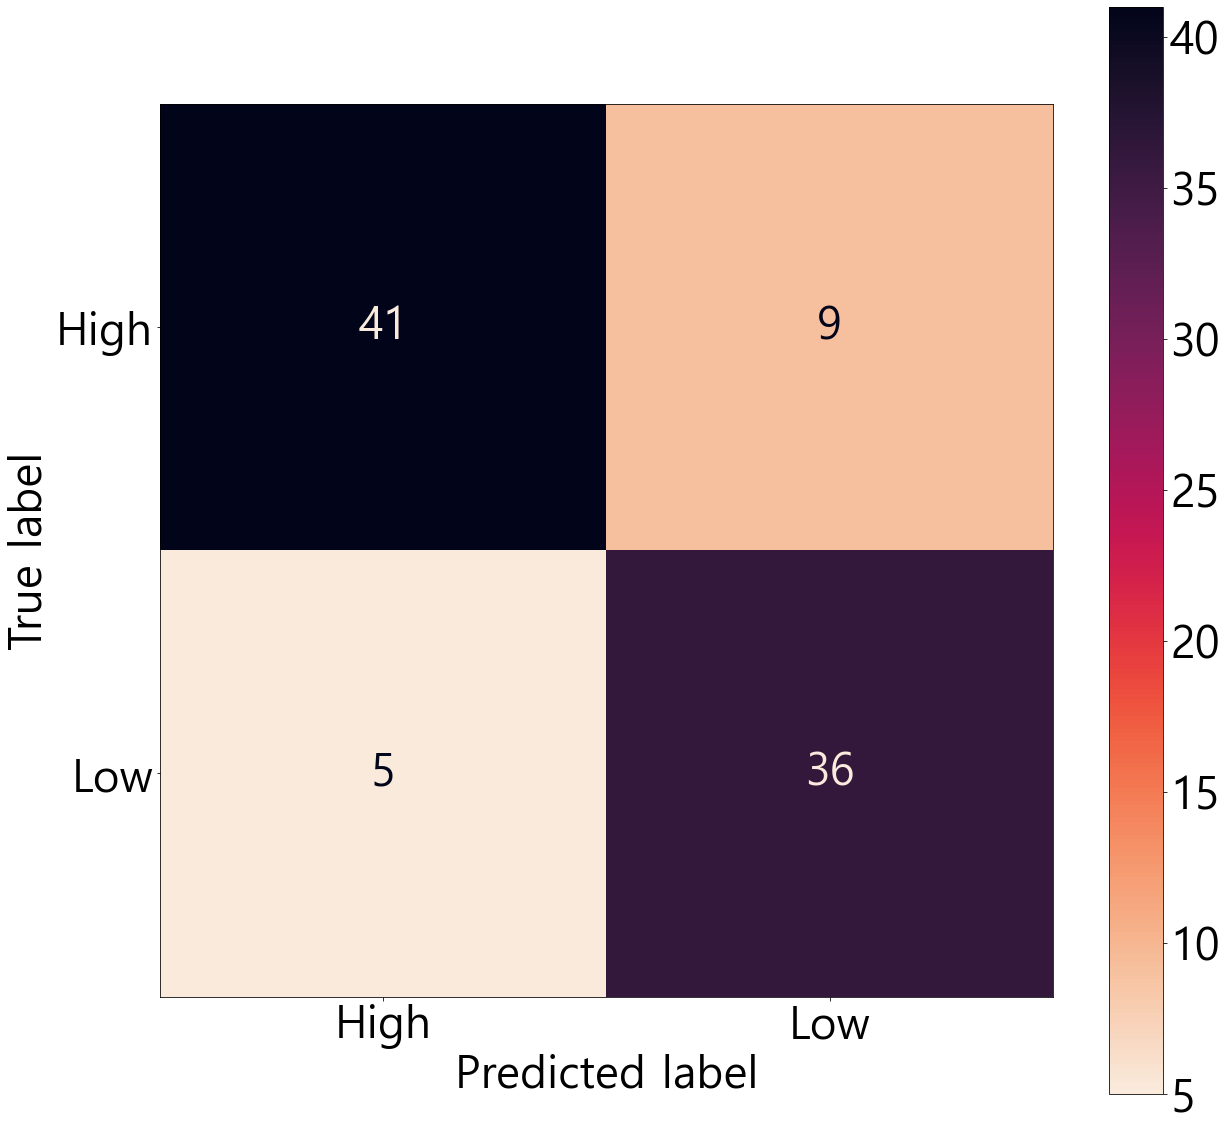

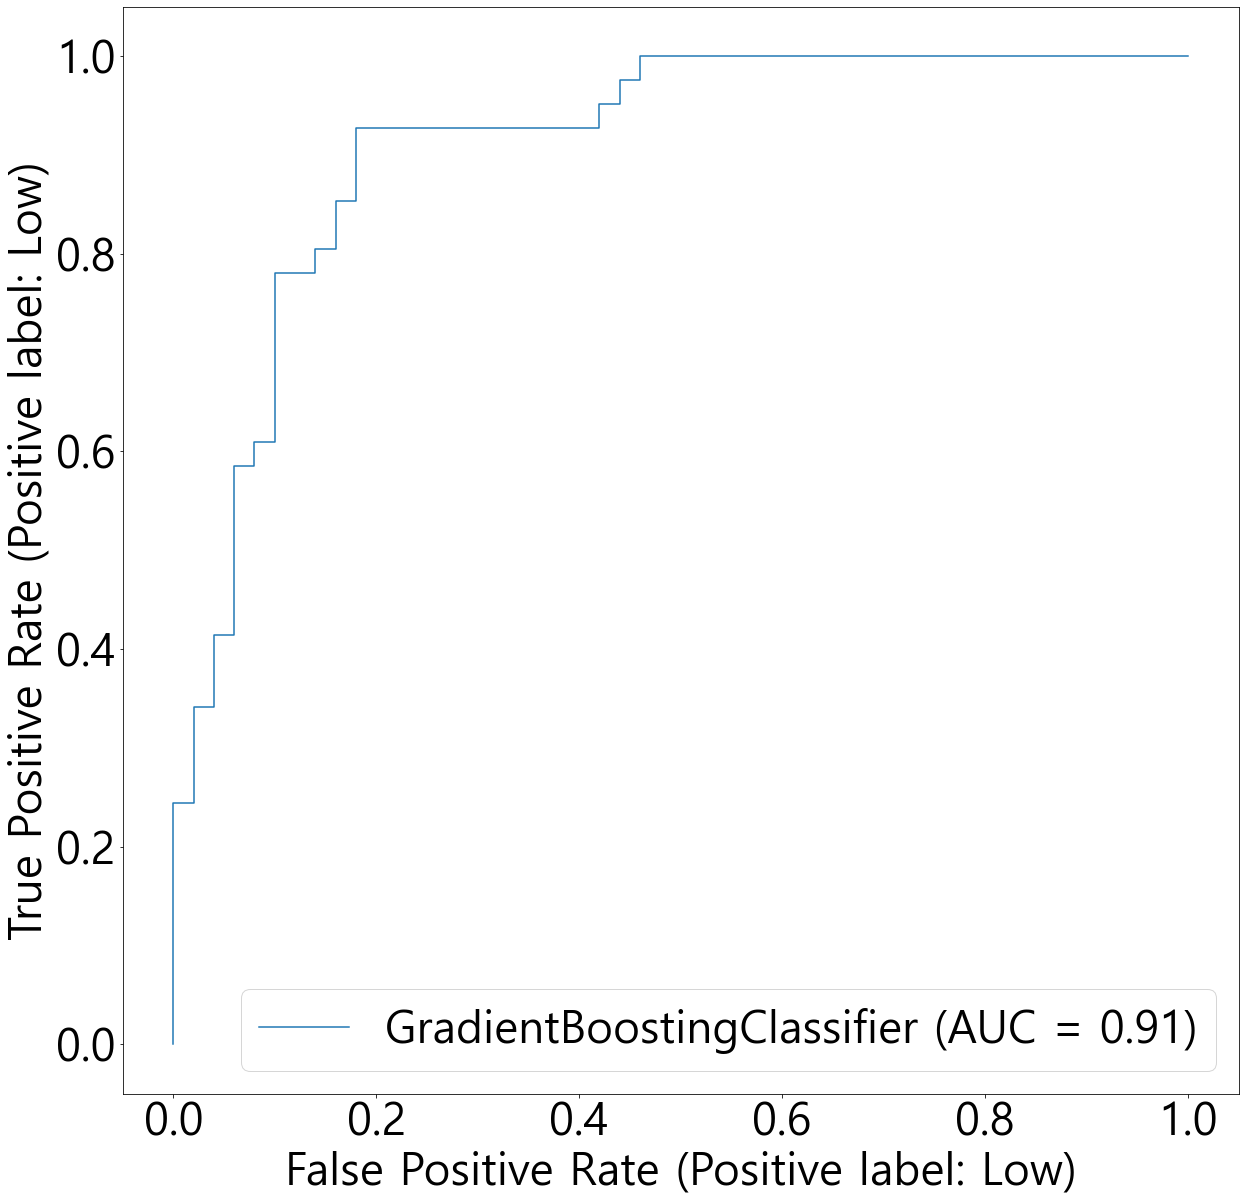

In [165]:
# 그래디언트 부스팅
gbrt = GradientBoostingClassifier(random_state=0)
Model(gbrt)

In [166]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data,data_target,test_size=0.2,random_state=42)

훈련 세트 정확도: 0.8636363636363636
테스트 세트 정확도: 0.8852459016393442


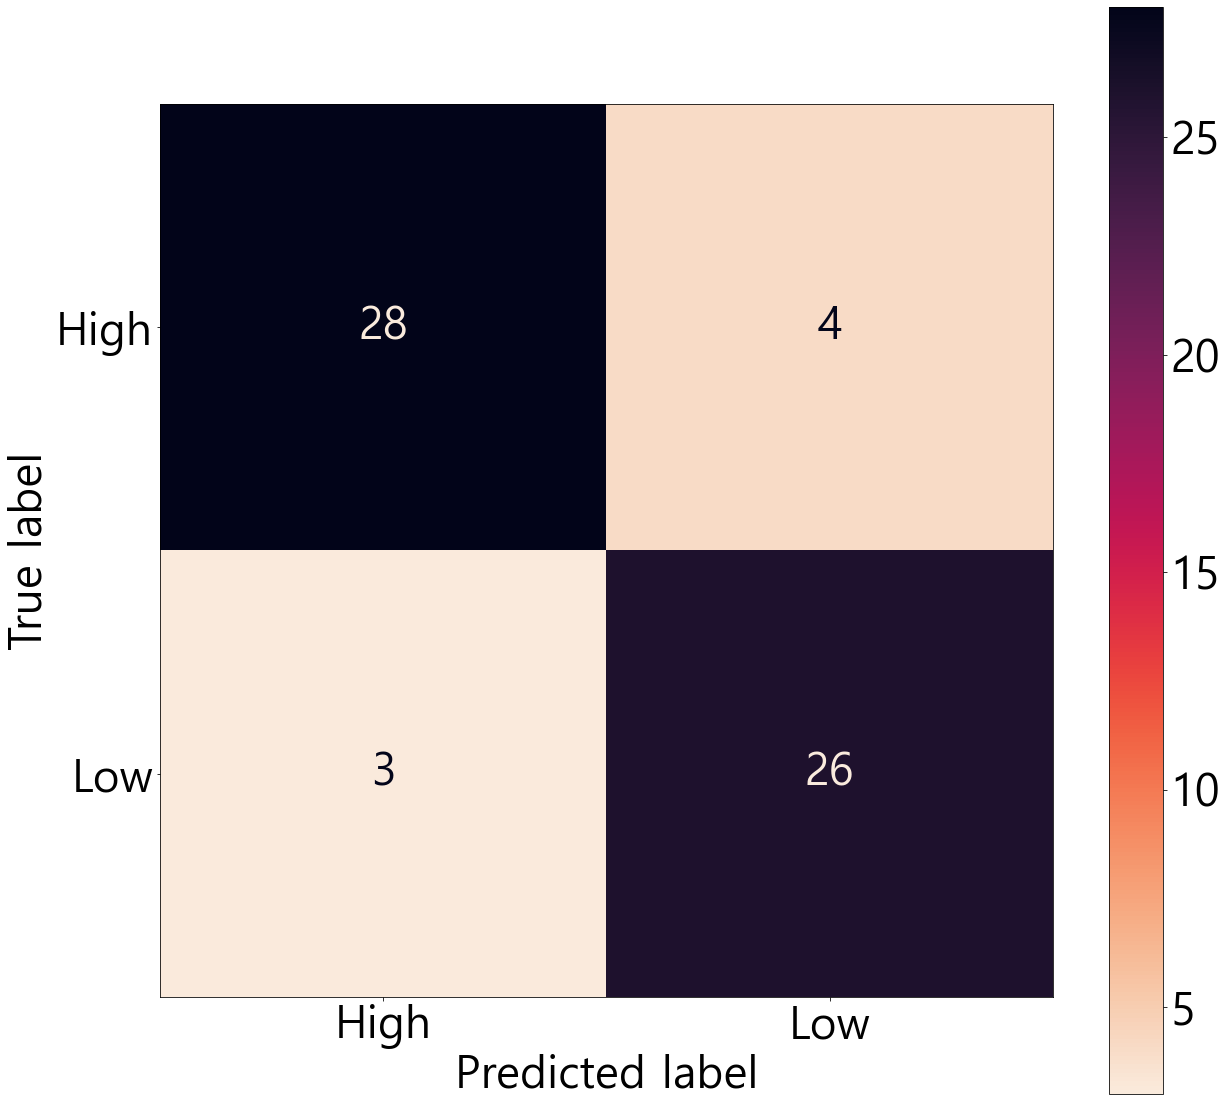

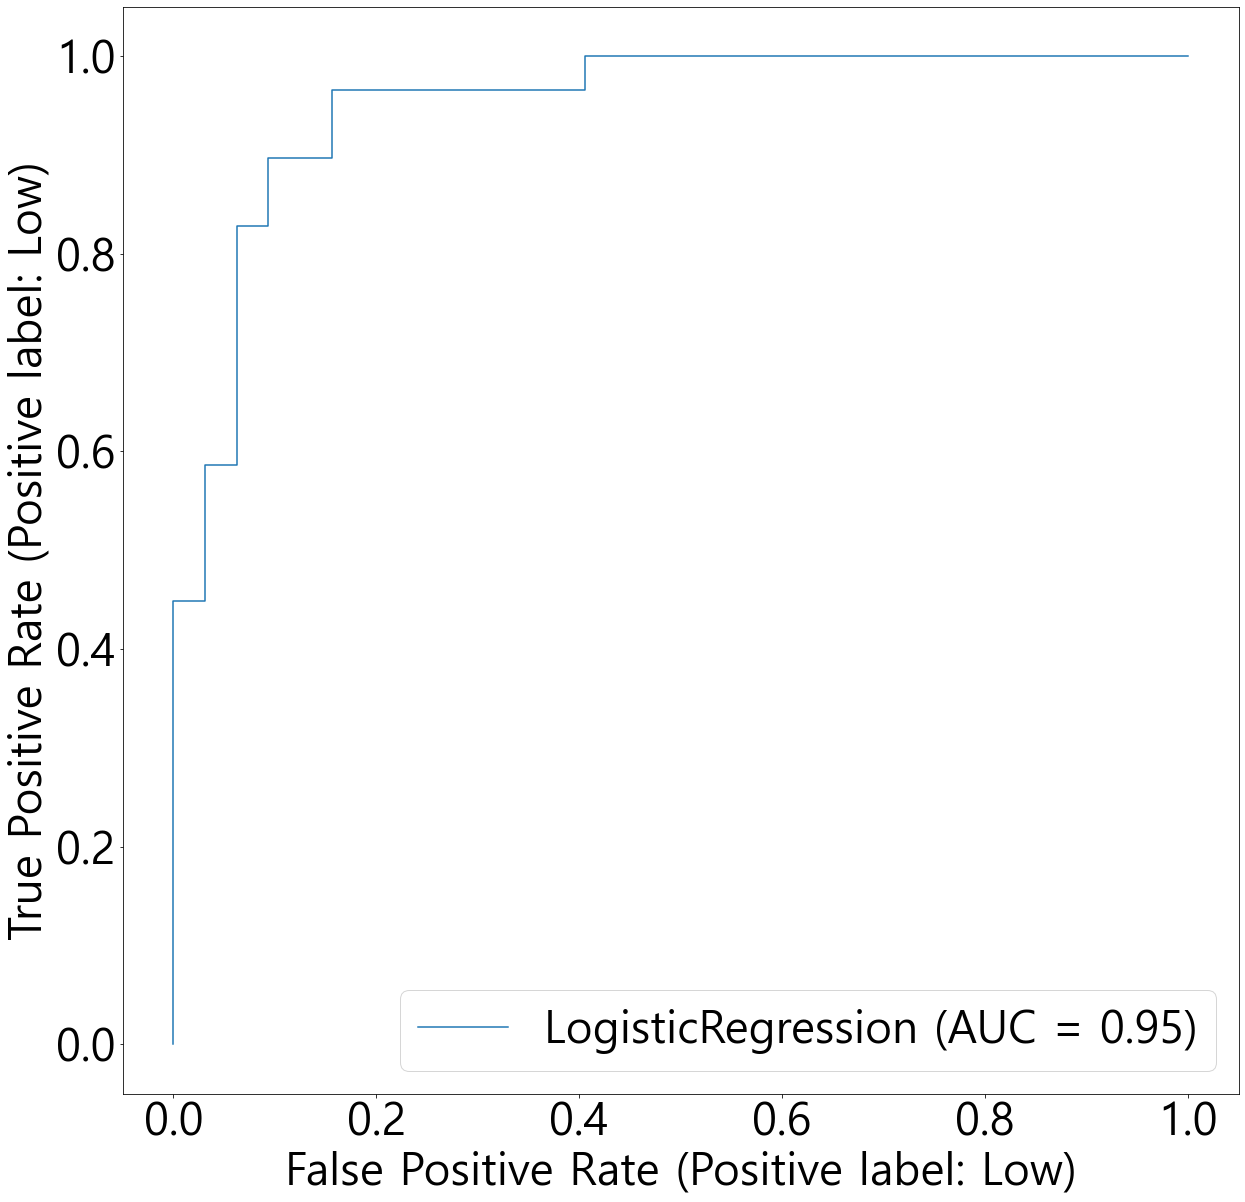

In [167]:
# Logistic Regression
lg_reg=LogisticRegression()

Model(lg_reg)

훈련 세트 정확도: 1.0
테스트 세트 정확도: 0.8032786885245902


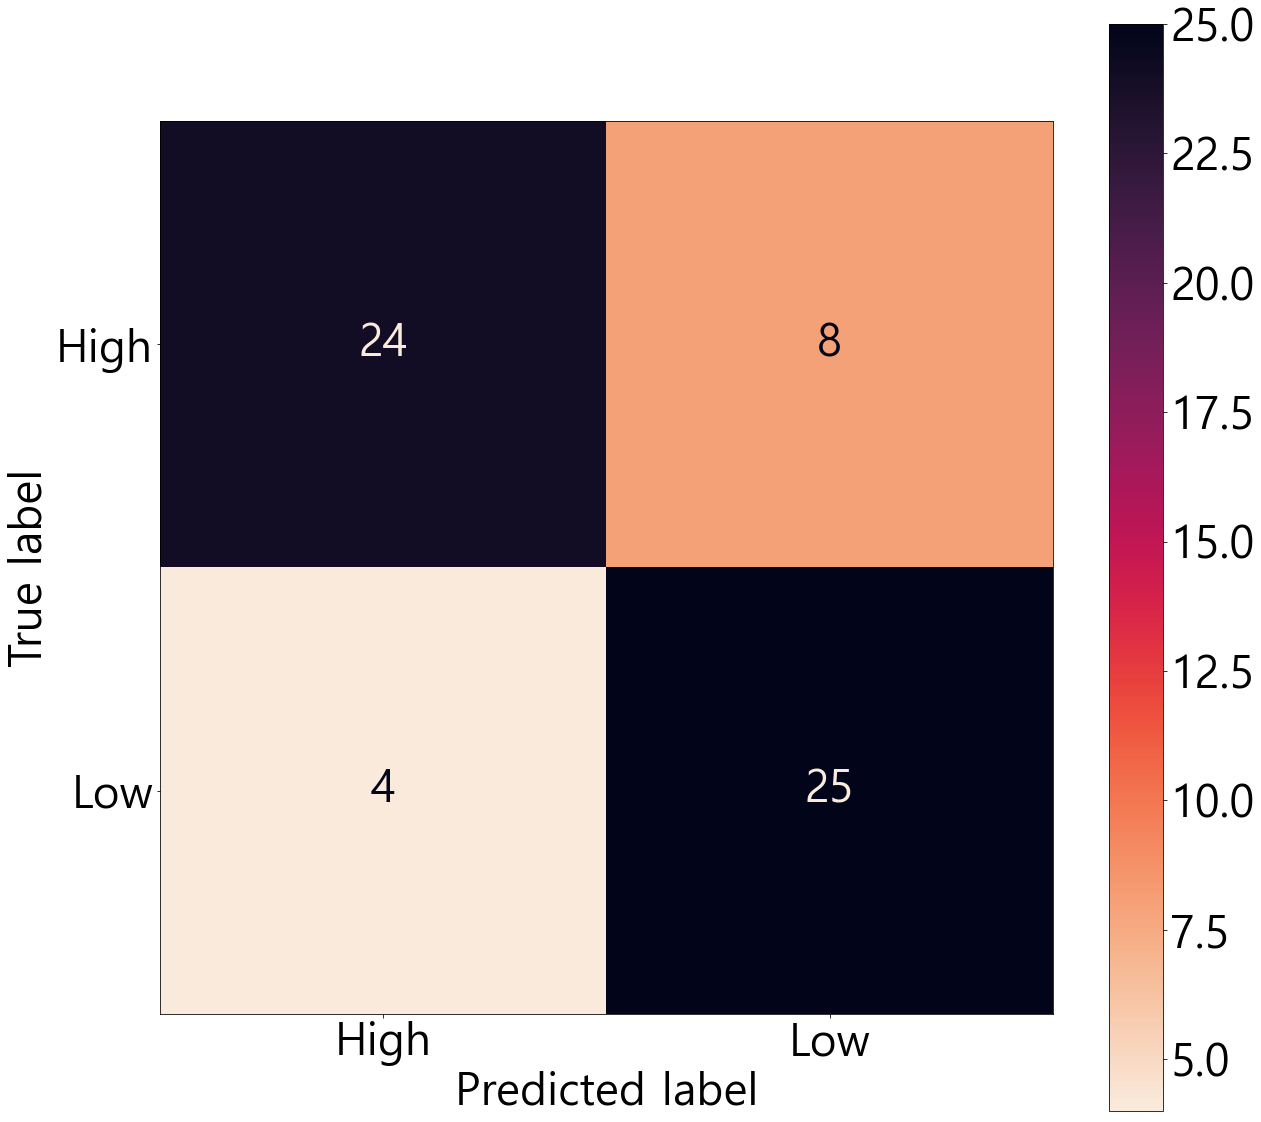

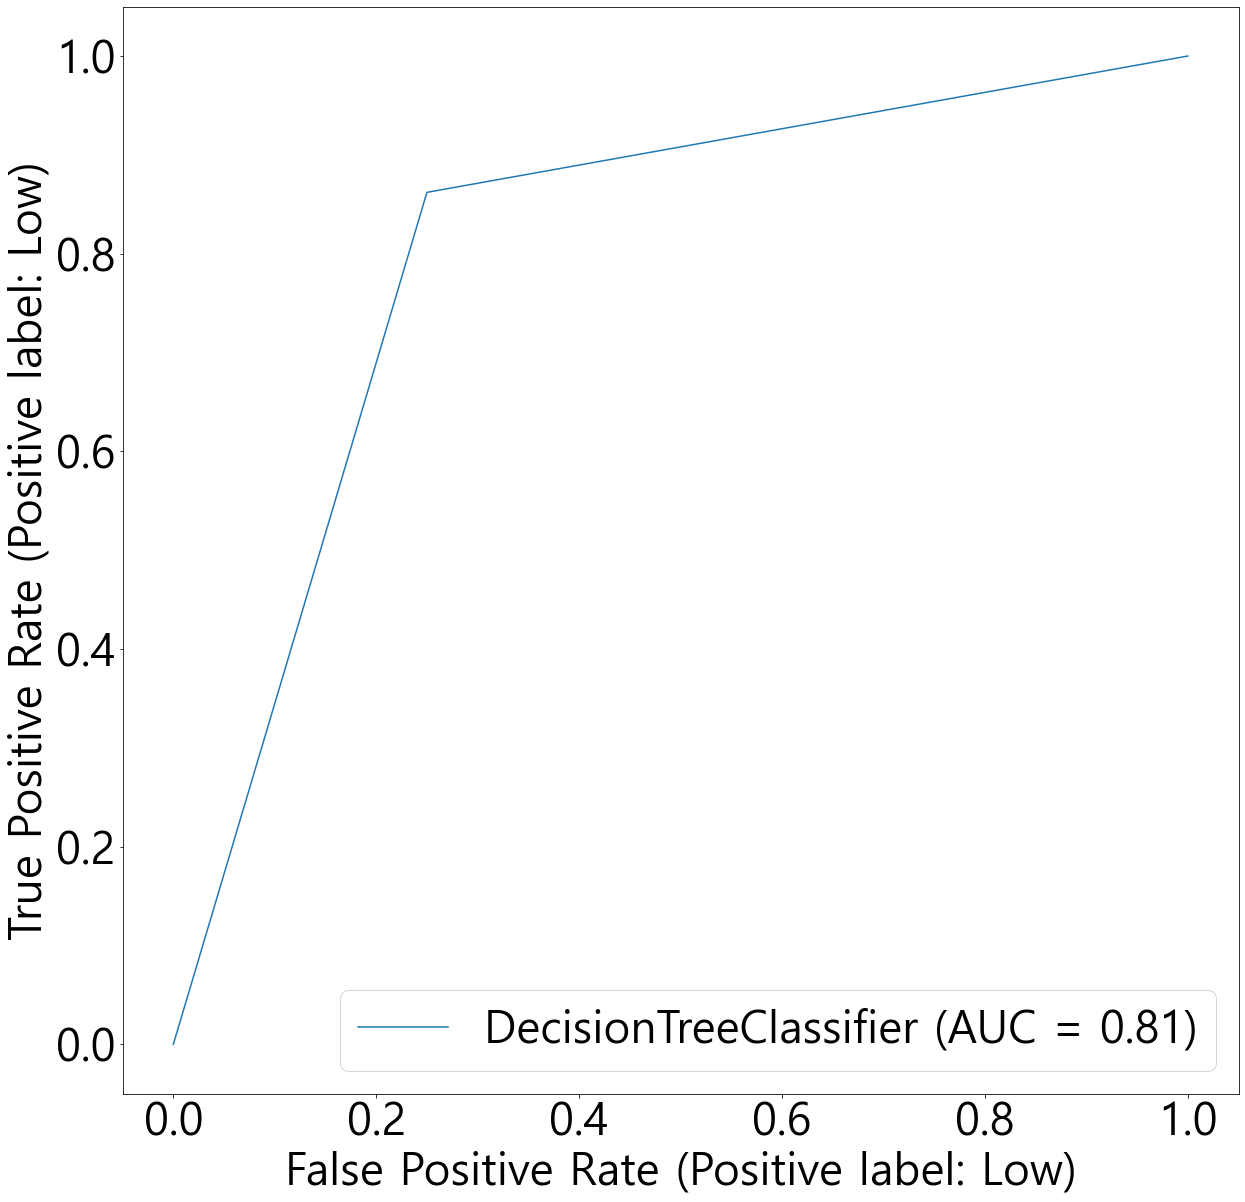

In [168]:
# Decision Tree Classification
d_classif= DecisionTreeClassifier()
Model(d_classif)

훈련 세트 정확도: 1.0
테스트 세트 정확도: 0.8524590163934426


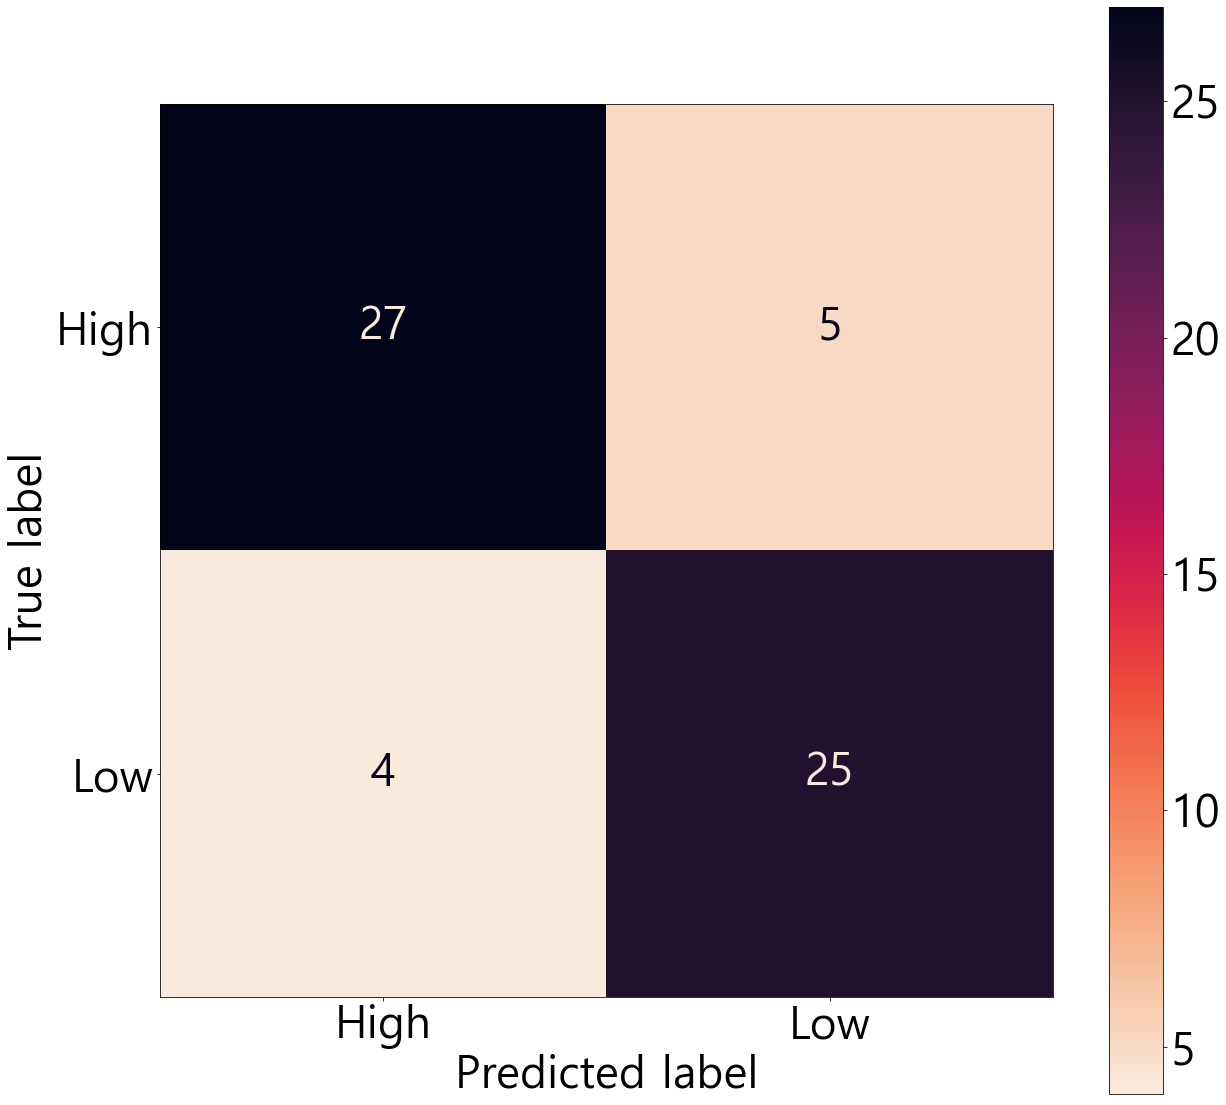

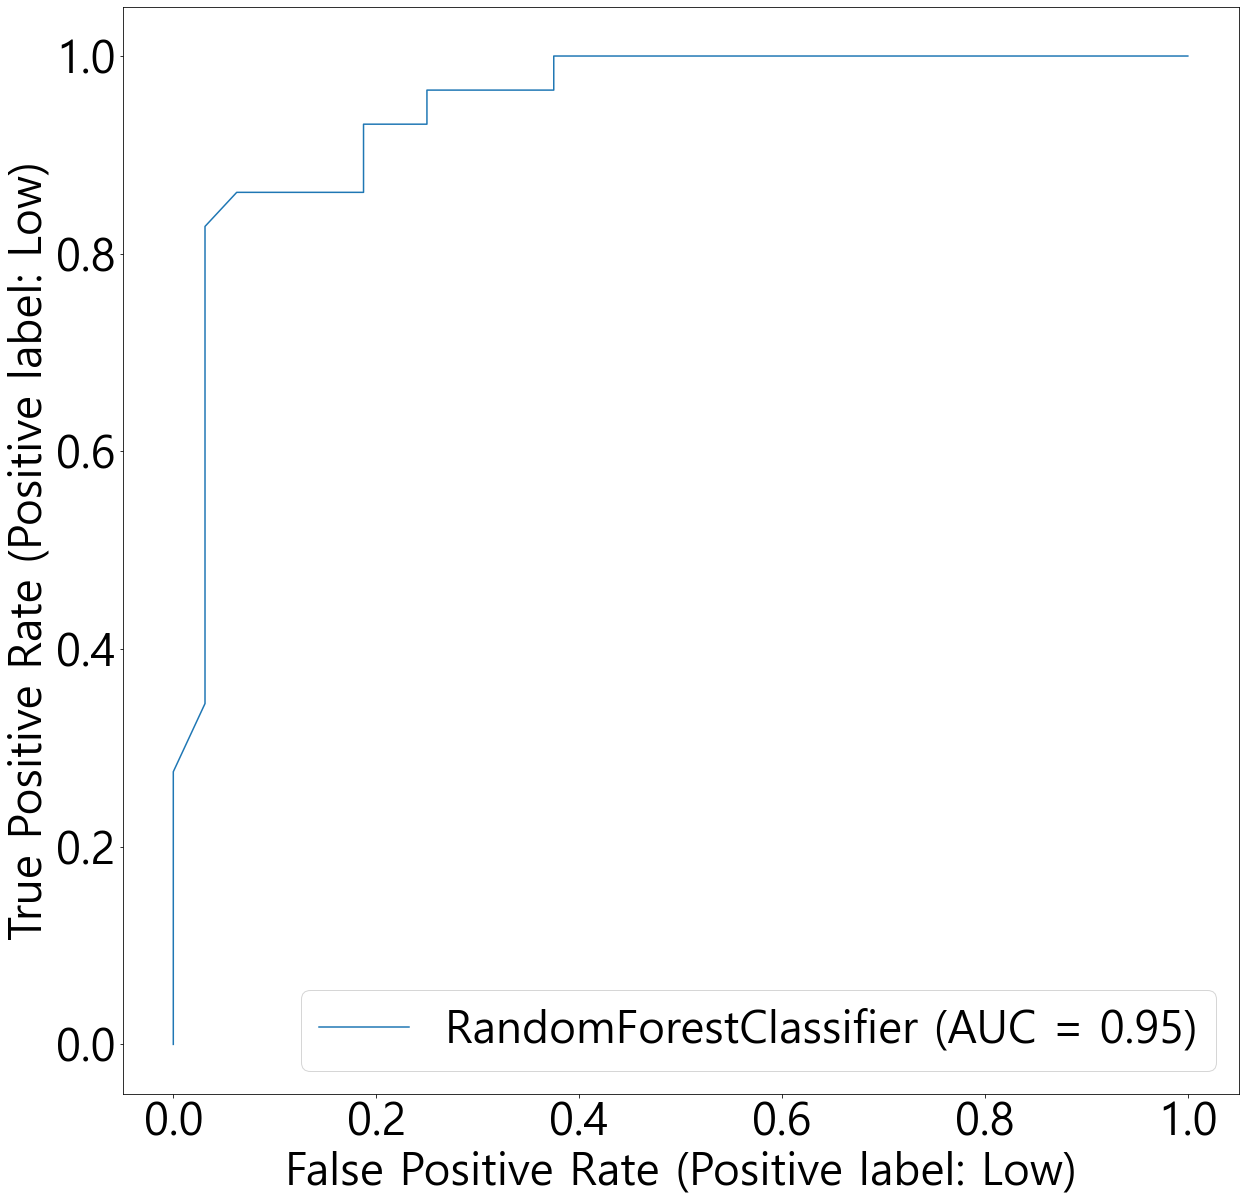

In [169]:
#Regression Trees
reg_tree = RandomForestClassifier()
Model(reg_tree)

훈련 세트 정확도: 0.6570247933884298
테스트 세트 정확도: 0.6885245901639344


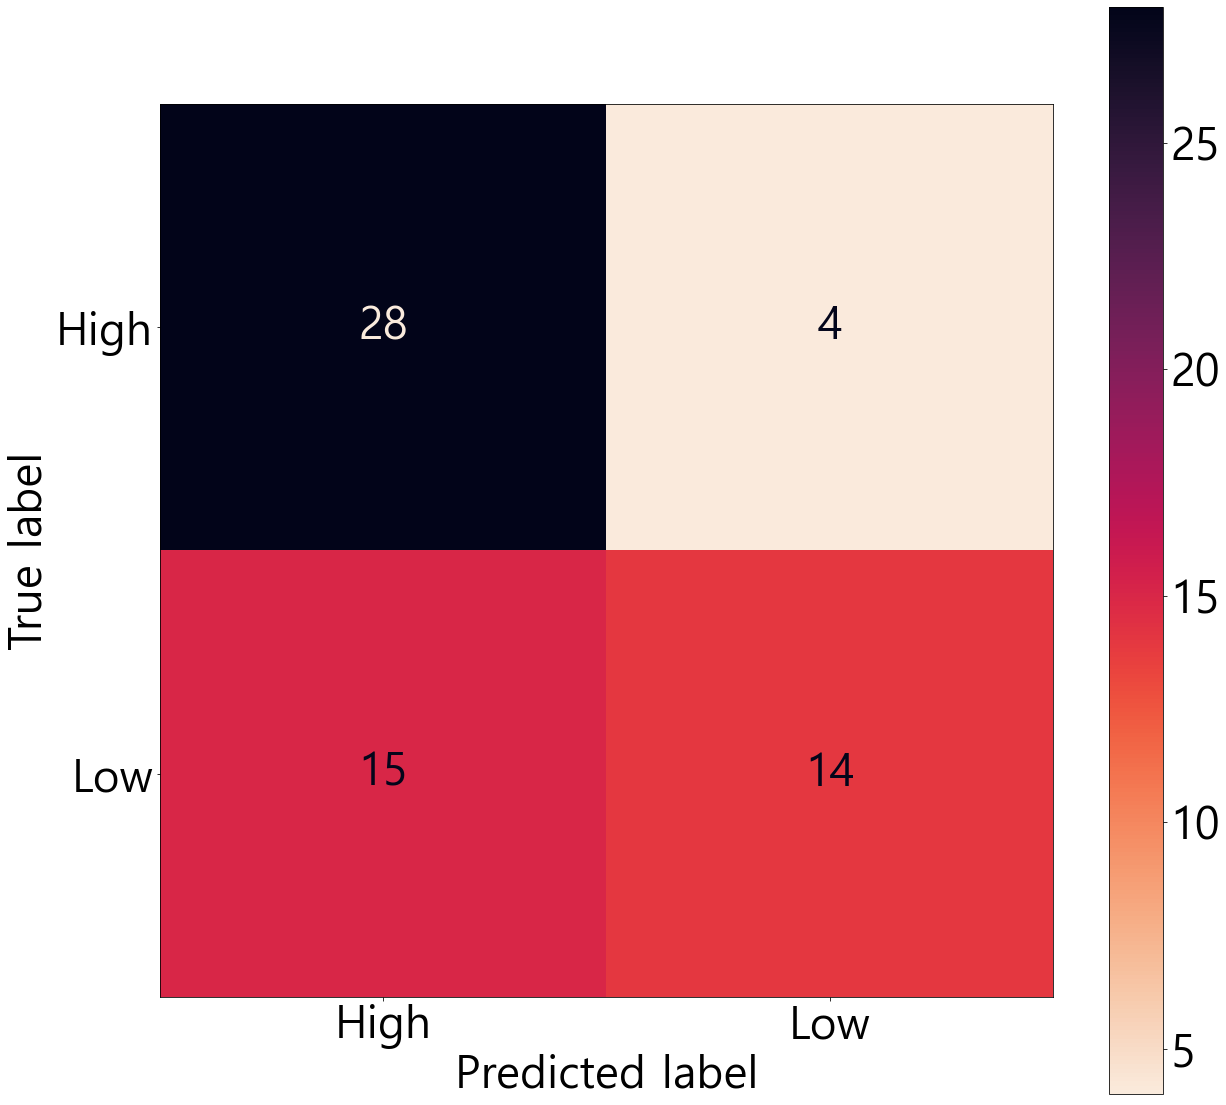

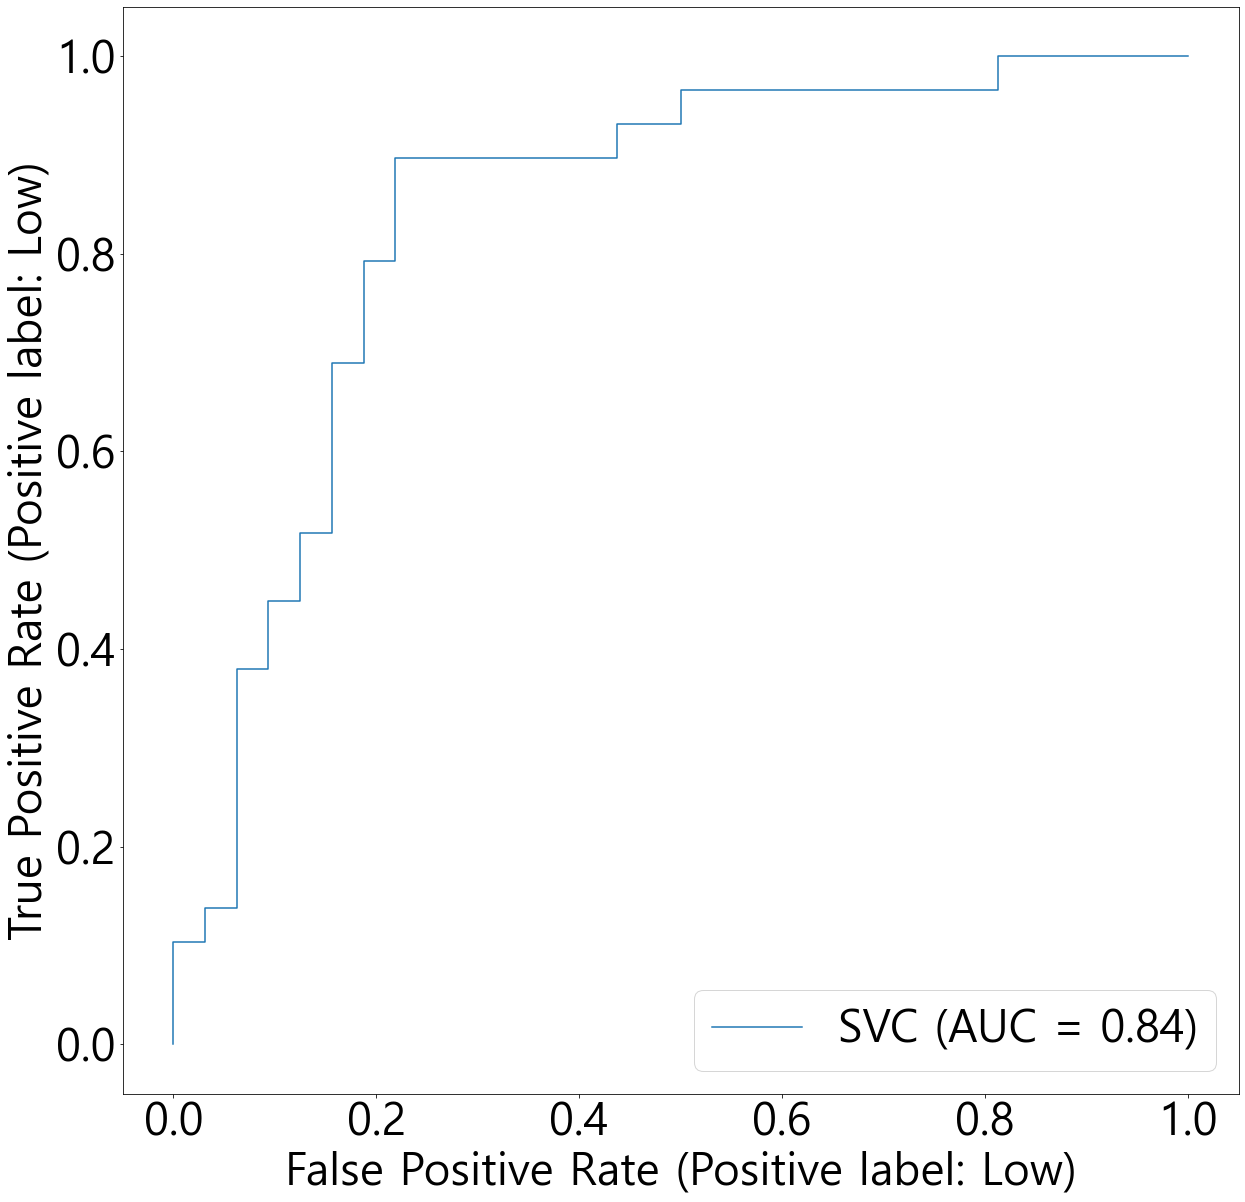

In [170]:
#SVM\
SVM = svm.SVC()
Model(SVM)

훈련 세트 정확도: 0.9958677685950413
테스트 세트 정확도: 0.8524590163934426


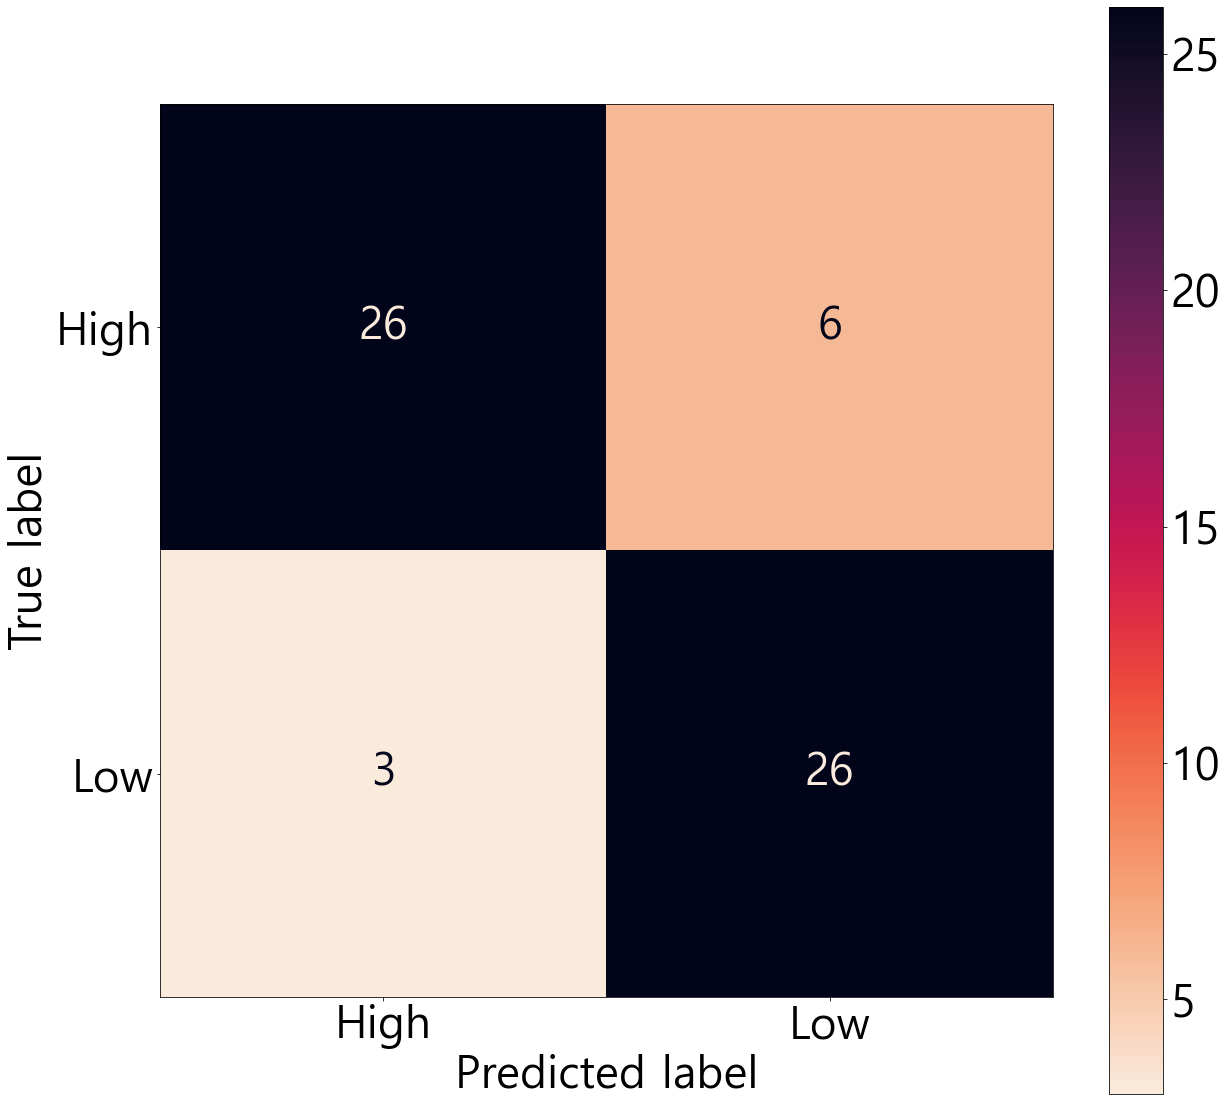

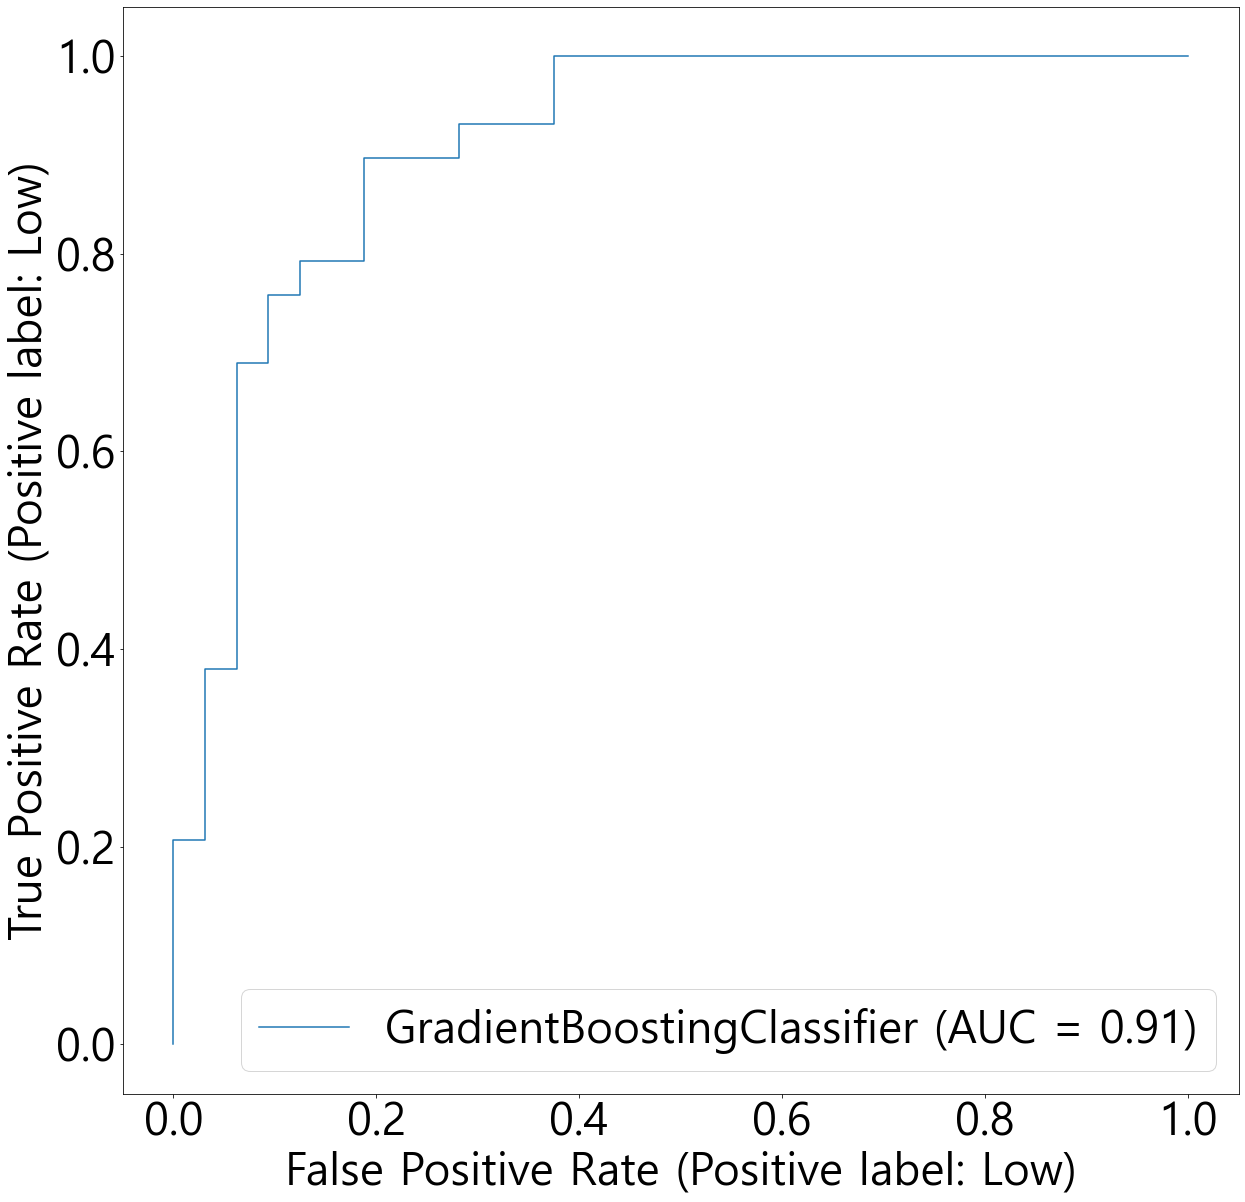

In [171]:
# 그래디언트 부스팅
gbrt = GradientBoostingClassifier(random_state=0)
Model(gbrt)

In [190]:
import os
os.environ["PATH"]+=os.pathsep+'../Graphviz/bin/'

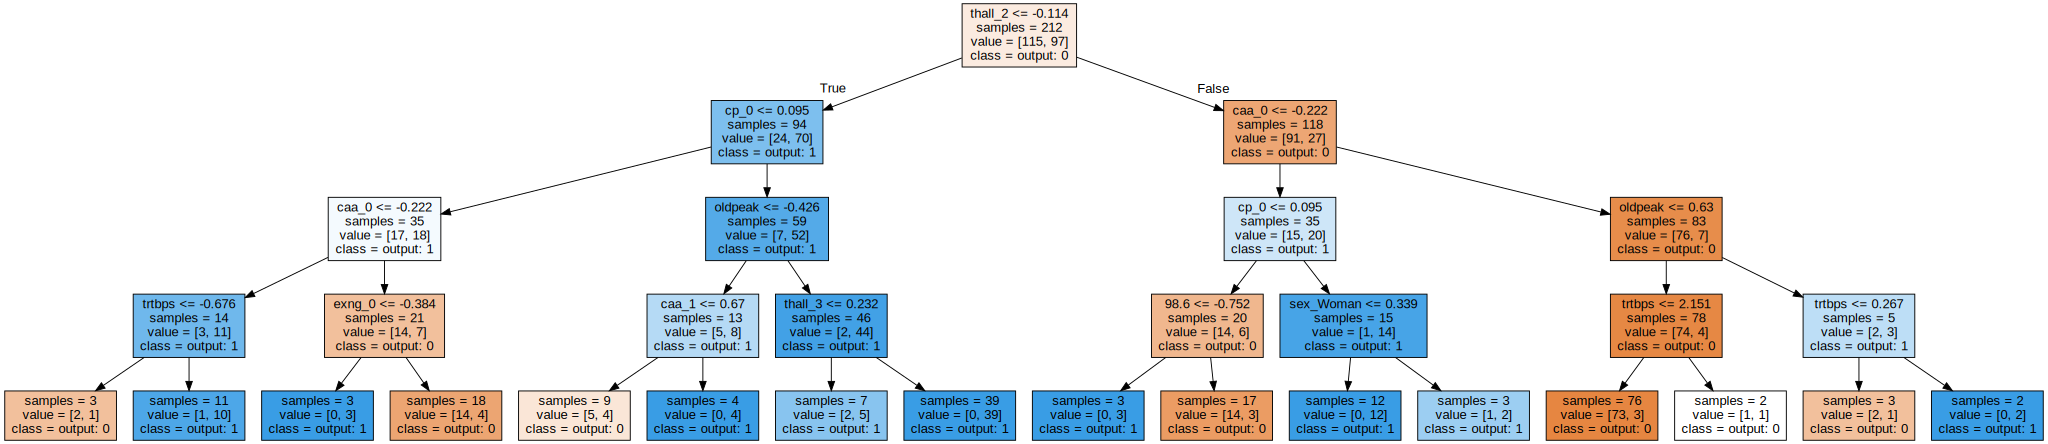

특성 중요도: 
[0.         0.04658371 0.         0.         0.06993688 0.04662146
 0.         0.0071888  0.17247953 0.         0.         0.
 0.         0.         0.         0.         0.         0.04193464
 0.         0.20380275 0.02304101 0.         0.         0.
 0.         0.         0.37535085 0.01306039]


In [192]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', class_names=['output: 0', 'output: 1'], feature_names=data.columns, impurity=False,
               filled=True)

graph = graphviz.Source(export_graphviz(tree, out_file='tree.dot', class_names=['output: 0', 'output: 1'], feature_names=data.columns, impurity=False,
               filled=True))
# graph.render(filename='test_img', directory='./', format='png')
# graph.render(filename='tree.png')


import graphviz

with open('tree.dot', encoding='utf-8')as f:
    dot_graph=f.read()
    display(graphviz.Source(dot_graph))
#     f.write('img.jpg')

print('특성 중요도: \n{}'.format(tree.feature_importances_))

In [77]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.846
